# MoK Target Variable Visualization

This notebook provides comprehensive visualizations and statistical analysis of the MoK (Monsoon Onset over Kerala) target variable: **DateRelJun01** (days relative to June 1st).

## Dataset Information
- **Target Variable**: DateRelJun01 - Days relative to June 1st
- **Time Range**: 1940-2025
- **Negative values**: Monsoon onset before June 1st
- **Positive values**: Monsoon onset after June 1st
- **Zero**: Monsoon onset exactly on June 1st

## 1. Load Data

In [11]:
# Load the MoK dates data
data_path = '/home/deepakns/Work/data/MoKDates.csv'
df = pd.read_csv(data_path)

# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst few rows:")
df.head(10)

Dataset shape: (86, 2)

Columns: ['Year', 'DateRelJun01']

Data types:
Year              int64
DateRelJun01    float64
dtype: object

First few rows:


,Year,DateRelJun01
0,1940,12.0
1,1941,-10.0
2,1942,9.0
3,1943,-11.0
4,1944,1.0
5,1945,4.0
6,1946,-1.0
7,1947,1.0
8,1948,8.0
9,1949,-14.0


In [12]:
# Convert DateRelJun01 to actual dates for better interpretation
def rel_days_to_date(year, days_rel):
    """Convert days relative to June 1st to actual date"""
    june_1 = datetime(year, 6, 1)
    actual_date = june_1 + timedelta(days=days_rel)
    return actual_date

df['ActualDate'] = df.apply(lambda row: rel_days_to_date(int(row['Year']), row['DateRelJun01']), axis=1)
df['Month'] = df['ActualDate'].dt.month
df['Day'] = df['ActualDate'].dt.day
df['MonthName'] = df['ActualDate'].dt.strftime('%B')
df['DateString'] = df['ActualDate'].dt.strftime('%B %d')

print("Sample data with converted dates:")
df[['Year', 'DateRelJun01', 'ActualDate', 'DateString']].head(10)

Sample data with converted dates:


,Year,DateRelJun01,ActualDate,DateString
0,1940,12.0,1940-06-13,June 13
1,1941,-10.0,1941-05-22,May 22
2,1942,9.0,1942-06-10,June 10
3,1943,-11.0,1943-05-21,May 21
4,1944,1.0,1944-06-02,June 02
5,1945,4.0,1945-06-05,June 05
6,1946,-1.0,1946-05-31,May 31
7,1947,1.0,1947-06-02,June 02
8,1948,8.0,1948-06-09,June 09
9,1949,-14.0,1949-05-18,May 18


## 2. Basic Statistics

In [24]:
# Descriptive statistics
print("="*60)
print("DESCRIPTIVE STATISTICS FOR DateRelJun01")
print("="*60)
print(df['DateRelJun01'].describe())
print(f"\nSkewness: {df['DateRelJun01'].skew():.4f}")
print(f"Kurtosis: {df['DateRelJun01'].kurtosis():.4f}")
print(f"\nMode: {df['DateRelJun01'].mode().values}")
print(f"Median: {df['DateRelJun01'].median():.2f}")
print(f"Mean: {df['DateRelJun01'].mean():.2f}")

DESCRIPTIVE STATISTICS FOR DateRelJun01
count    86.000000
mean     -0.883721
std       7.228080
min     -19.000000
25%      -6.000000
50%      -1.000000
75%       4.000000
max      17.000000
Name: DateRelJun01, dtype: float64

Skewness: -0.1073
Kurtosis: -0.0457

Mode: [-1.]
Median: -1.00
Mean: -0.88


In [25]:
# Distribution of onset timing
print("\n" + "="*60)
print("ONSET TIMING DISTRIBUTION")
print("="*60)
early_onset = (df['DateRelJun01'] < 0).sum()
on_time = (df['DateRelJun01'] == 0).sum()
late_onset = (df['DateRelJun01'] > 0).sum()

print(f"Early onset (before June 1): {early_onset} ({early_onset/len(df)*100:.1f}%)")
print(f"On-time onset (June 1): {on_time} ({on_time/len(df)*100:.1f}%)")
print(f"Late onset (after June 1): {late_onset} ({late_onset/len(df)*100:.1f}%)")

print(f"\nEarliest onset: {df['DateRelJun01'].min():.0f} days (Year: {df.loc[df['DateRelJun01'].idxmin(), 'Year']:.0f}) - {df.loc[df['DateRelJun01'].idxmin(), 'DateString']}")
print(f"Latest onset: {df['DateRelJun01'].max():.0f} days (Year: {df.loc[df['DateRelJun01'].idxmax(), 'Year']:.0f}) - {df.loc[df['DateRelJun01'].idxmax(), 'DateString']}")
print(f"Range: {df['DateRelJun01'].max() - df['DateRelJun01'].min():.0f} days")


ONSET TIMING DISTRIBUTION
Early onset (before June 1): 48 (55.8%)
On-time onset (June 1): 4 (4.7%)
Late onset (after June 1): 34 (39.5%)

Earliest onset: -19 days (Year: 1960) - May 13
Latest onset: 17 days (Year: 1972) - June 18
Range: 36 days


## 3. Time Series Visualization

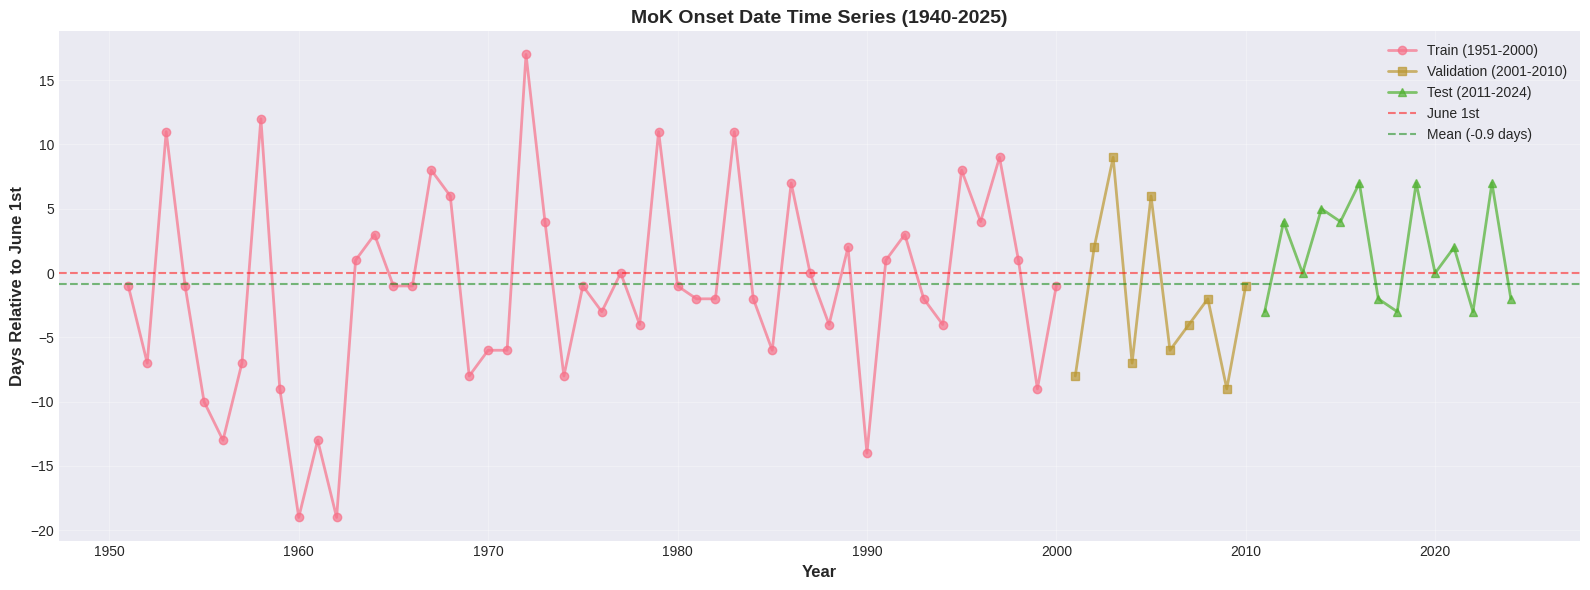

In [19]:
# Time series plot with train/val/test splits
fig, ax = plt.subplots(figsize=(16, 6))

# Define splits based on config
train_mask = (df['Year'] >= 1951) & (df['Year'] <= 2000)
val_mask = (df['Year'] >= 2001) & (df['Year'] <= 2010)
test_mask = (df['Year'] >= 2011) & (df['Year'] <= 2024)

# Plot data
ax.plot(df[train_mask]['Year'], df[train_mask]['DateRelJun01'], 'o-', label='Train (1951-2000)', alpha=0.7, linewidth=2)
ax.plot(df[val_mask]['Year'], df[val_mask]['DateRelJun01'], 's-', label='Validation (2001-2010)', alpha=0.7, linewidth=2)
ax.plot(df[test_mask]['Year'], df[test_mask]['DateRelJun01'], '^-', label='Test (2011-2024)', alpha=0.7, linewidth=2)

# Add reference lines
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='June 1st')
ax.axhline(y=df['DateRelJun01'].mean(), color='green', linestyle='--', alpha=0.5, label=f'Mean ({df["DateRelJun01"].mean():.1f} days)')

# Styling
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Days Relative to June 1st', fontsize=12, fontweight='bold')
ax.set_title('MoK Onset Date Time Series (1940-2025)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

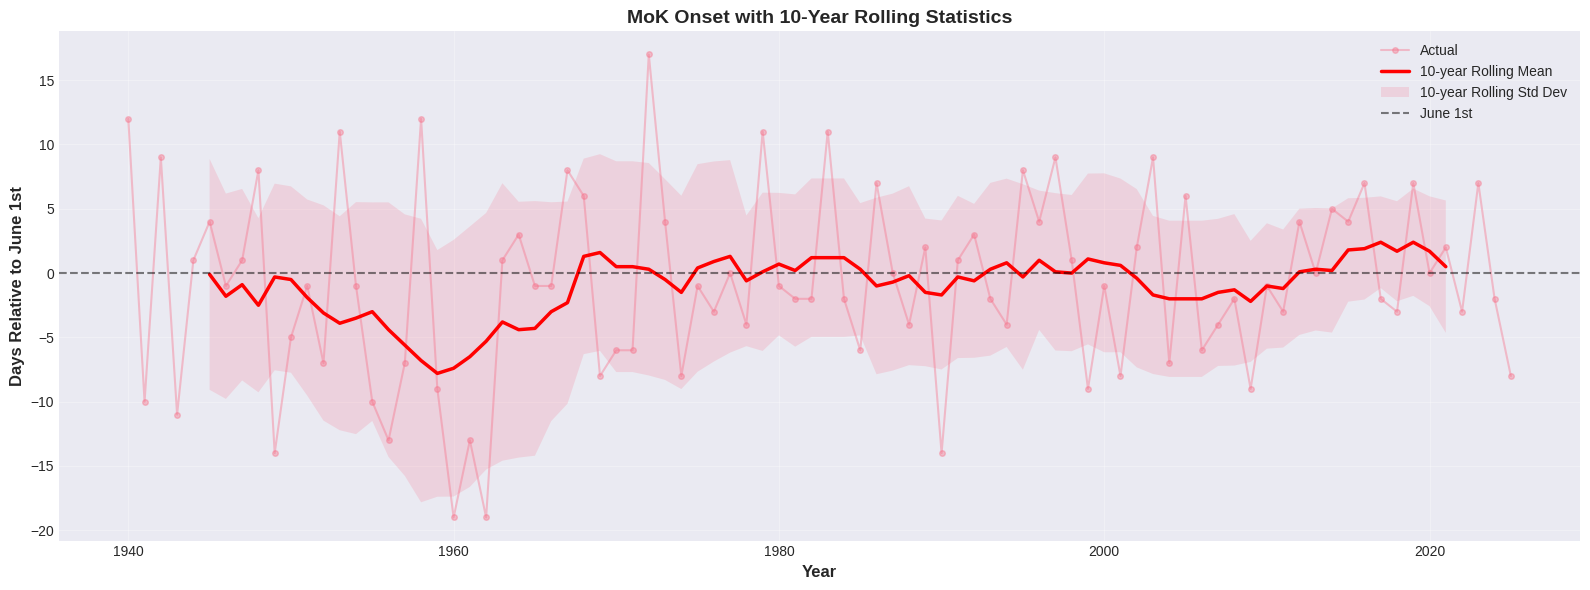

In [20]:
# Time series with rolling statistics
fig, ax = plt.subplots(figsize=(16, 6))

# Calculate rolling statistics
window = 10
rolling_mean = df['DateRelJun01'].rolling(window=window, center=True).mean()
rolling_std = df['DateRelJun01'].rolling(window=window, center=True).std()

# Plot
ax.plot(df['Year'], df['DateRelJun01'], 'o-', alpha=0.4, label='Actual', markersize=4)
ax.plot(df['Year'], rolling_mean, 'r-', linewidth=2.5, label=f'{window}-year Rolling Mean')
ax.fill_between(df['Year'], 
                rolling_mean - rolling_std, 
                rolling_mean + rolling_std, 
                alpha=0.2, label=f'{window}-year Rolling Std Dev')

ax.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='June 1st')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Days Relative to June 1st', fontsize=12, fontweight='bold')
ax.set_title(f'MoK Onset with {window}-Year Rolling Statistics', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Distribution Analysis

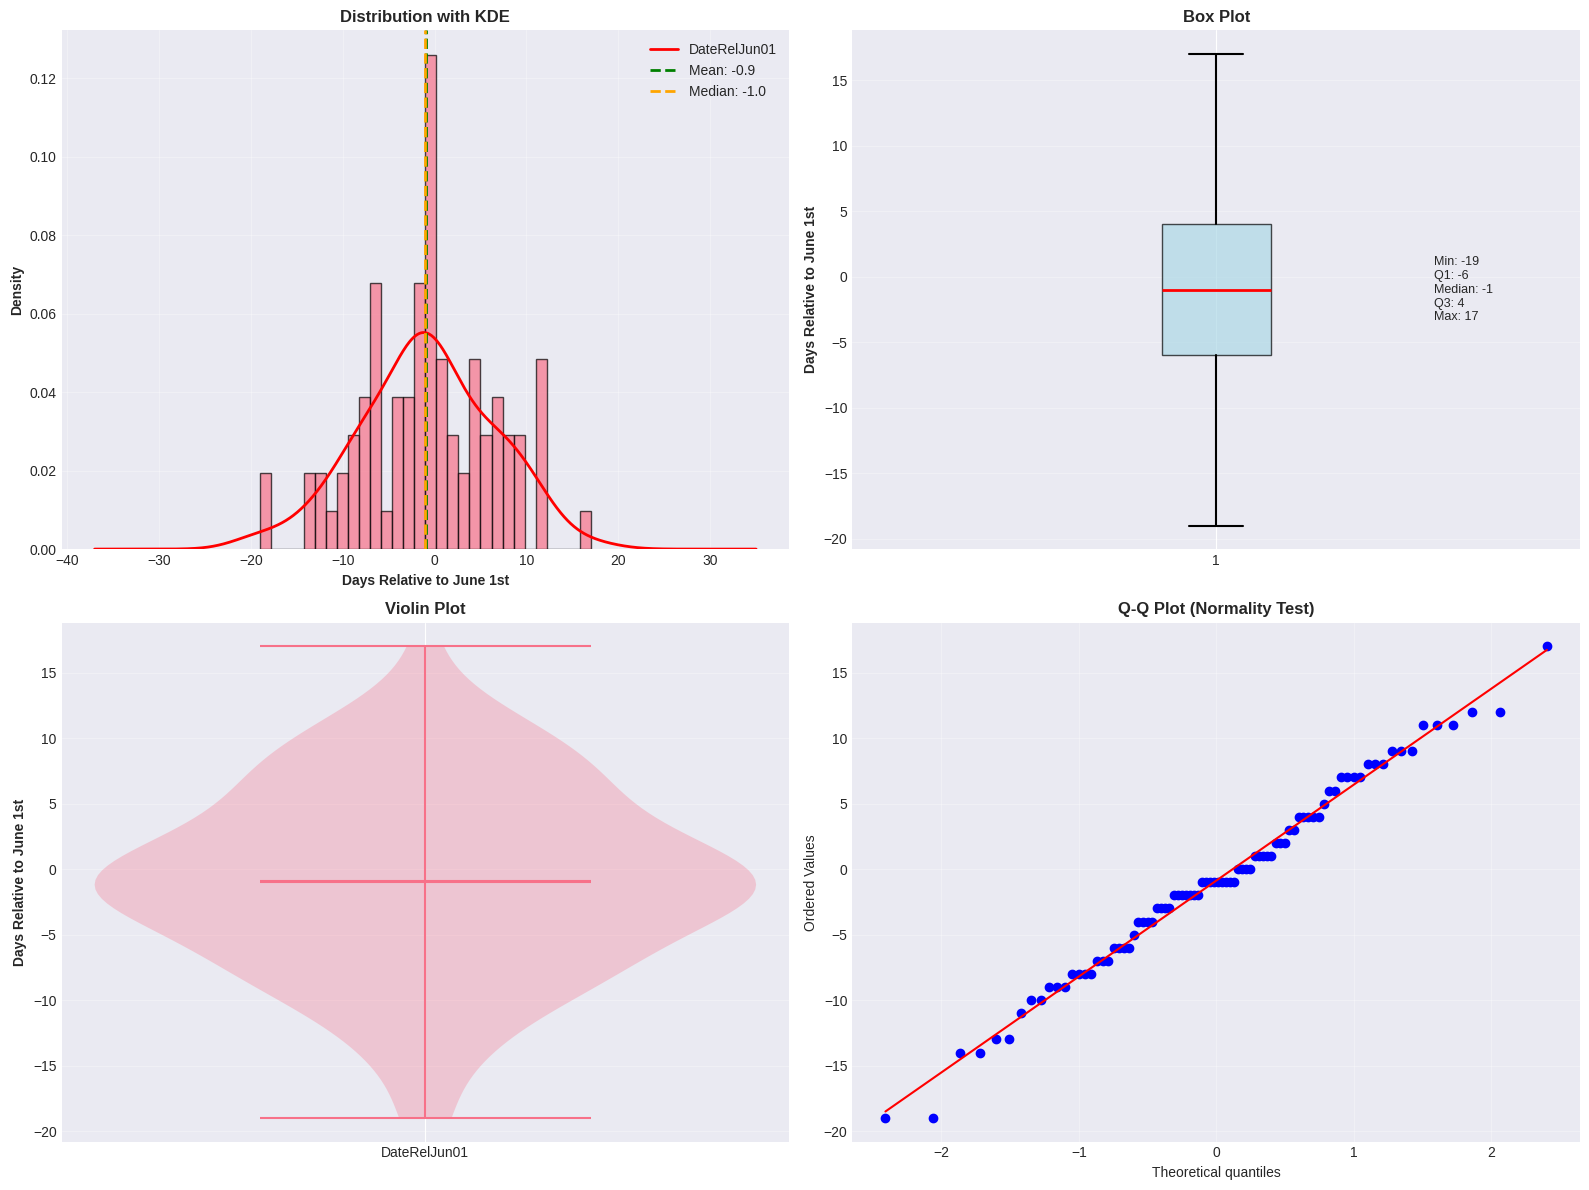

In [21]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram with KDE
axes[0, 0].hist(df['DateRelJun01'], bins=30, edgecolor='black', alpha=0.7, density=True)
df['DateRelJun01'].plot(kind='kde', ax=axes[0, 0], linewidth=2, color='red')
axes[0, 0].axvline(df['DateRelJun01'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["DateRelJun01"].mean():.1f}')
axes[0, 0].axvline(df['DateRelJun01'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["DateRelJun01"].median():.1f}')
axes[0, 0].set_xlabel('Days Relative to June 1st', fontweight='bold')
axes[0, 0].set_ylabel('Density', fontweight='bold')
axes[0, 0].set_title('Distribution with KDE', fontweight='bold', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot
bp = axes[0, 1].boxplot(df['DateRelJun01'], vert=True, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(linewidth=1.5),
                        capprops=dict(linewidth=1.5))
axes[0, 1].set_ylabel('Days Relative to June 1st', fontweight='bold')
axes[0, 1].set_title('Box Plot', fontweight='bold', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add statistics to box plot
stats_text = f"Min: {df['DateRelJun01'].min():.0f}\nQ1: {df['DateRelJun01'].quantile(0.25):.0f}\nMedian: {df['DateRelJun01'].median():.0f}\nQ3: {df['DateRelJun01'].quantile(0.75):.0f}\nMax: {df['DateRelJun01'].max():.0f}"
axes[0, 1].text(1.3, df['DateRelJun01'].median(), stats_text, fontsize=9, verticalalignment='center')

# Violin plot
parts = axes[1, 0].violinplot([df['DateRelJun01']], positions=[0], showmeans=True, showmedians=True)
axes[1, 0].set_ylabel('Days Relative to June 1st', fontweight='bold')
axes[1, 0].set_title('Violin Plot', fontweight='bold', fontsize=12)
axes[1, 0].set_xticks([0])
axes[1, 0].set_xticklabels(['DateRelJun01'])
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Q-Q plot for normality check
stats.probplot(df['DateRelJun01'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Test)', fontweight='bold', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Normality test
from scipy.stats import shapiro, normaltest

print("="*60)
print("NORMALITY TESTS")
print("="*60)

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(df['DateRelJun01'])
print(f"\nShapiro-Wilk Test:")
print(f"  Test Statistic: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.4f}")
print(f"  Result: {'Normal distribution' if shapiro_p > 0.05 else 'Not normal distribution'} (α=0.05)")

# D'Agostino's K-squared test
normal_stat, normal_p = normaltest(df['DateRelJun01'])
print(f"\nD'Agostino's K-squared Test:")
print(f"  Test Statistic: {normal_stat:.4f}")
print(f"  P-value: {normal_p:.4f}")
print(f"  Result: {'Normal distribution' if normal_p > 0.05 else 'Not normal distribution'} (α=0.05)")

NORMALITY TESTS

Shapiro-Wilk Test:
  Test Statistic: 0.9900
  P-value: 0.7550
  Result: Normal distribution (α=0.05)

D'Agostino's K-squared Test:
  Test Statistic: 0.1923
  P-value: 0.9083
  Result: Normal distribution (α=0.05)


## 5. Frequency and Categorical Analysis

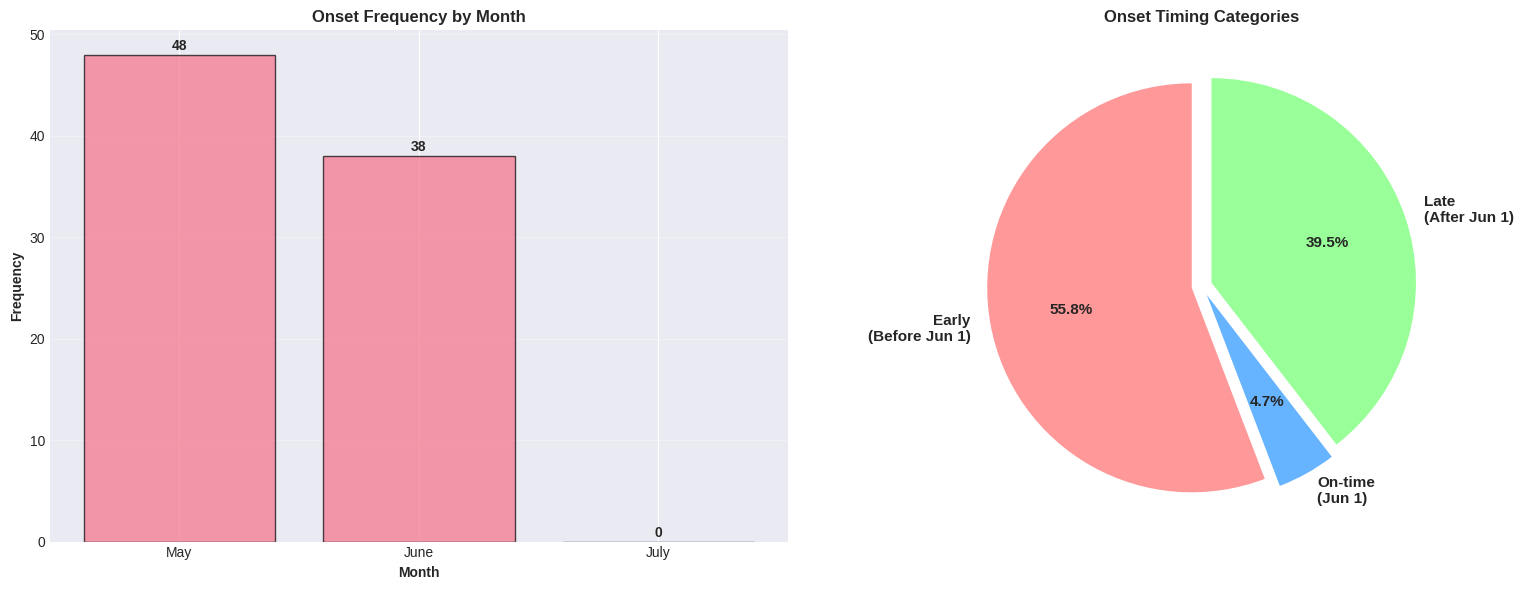

In [26]:
# Month-wise distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count by month
month_counts = df['MonthName'].value_counts().sort_index()
month_order = ['May', 'June', 'July']
month_counts = month_counts.reindex(month_order, fill_value=0)

axes[0].bar(month_counts.index, month_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Month', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Onset Frequency by Month', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Add counts on bars
for i, (month, count) in enumerate(month_counts.items()):
    axes[0].text(i, count + 0.5, str(int(count)), ha='center', fontweight='bold')

# Onset category pie chart
categories = ['Early\n(Before Jun 1)', 'On-time\n(Jun 1)', 'Late\n(After Jun 1)']
values = [early_onset, on_time, late_onset]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.05, 0.05, 0.05)

axes[1].pie(values, labels=categories, autopct='%1.1f%%', startangle=90, 
            colors=colors, explode=explode, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Onset Timing Categories', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

In [27]:
# Value counts and frequency table
value_counts = df['DateRelJun01'].value_counts().sort_index()
print("\n" + "="*60)
print("MOST COMMON ONSET DATES")
print("="*60)
top_dates = df['DateRelJun01'].value_counts().head(10)
for days, count in top_dates.items():
    date_str = df[df['DateRelJun01'] == days]['DateString'].iloc[0]
    print(f"  {days:3.0f} days ({date_str:15s}): {count} occurrences")


MOST COMMON ONSET DATES
   -1 days (May 31         ): 9 occurrences
   -2 days (May 30         ): 7 occurrences
    1 days (June 02        ): 5 occurrences
    4 days (June 05        ): 5 occurrences
   -6 days (May 26         ): 4 occurrences
   -4 days (May 28         ): 4 occurrences
    7 days (June 08        ): 4 occurrences
   -8 days (May 24         ): 4 occurrences
   -3 days (May 29         ): 4 occurrences
    0 days (June 01        ): 4 occurrences


## 6. Temporal Patterns

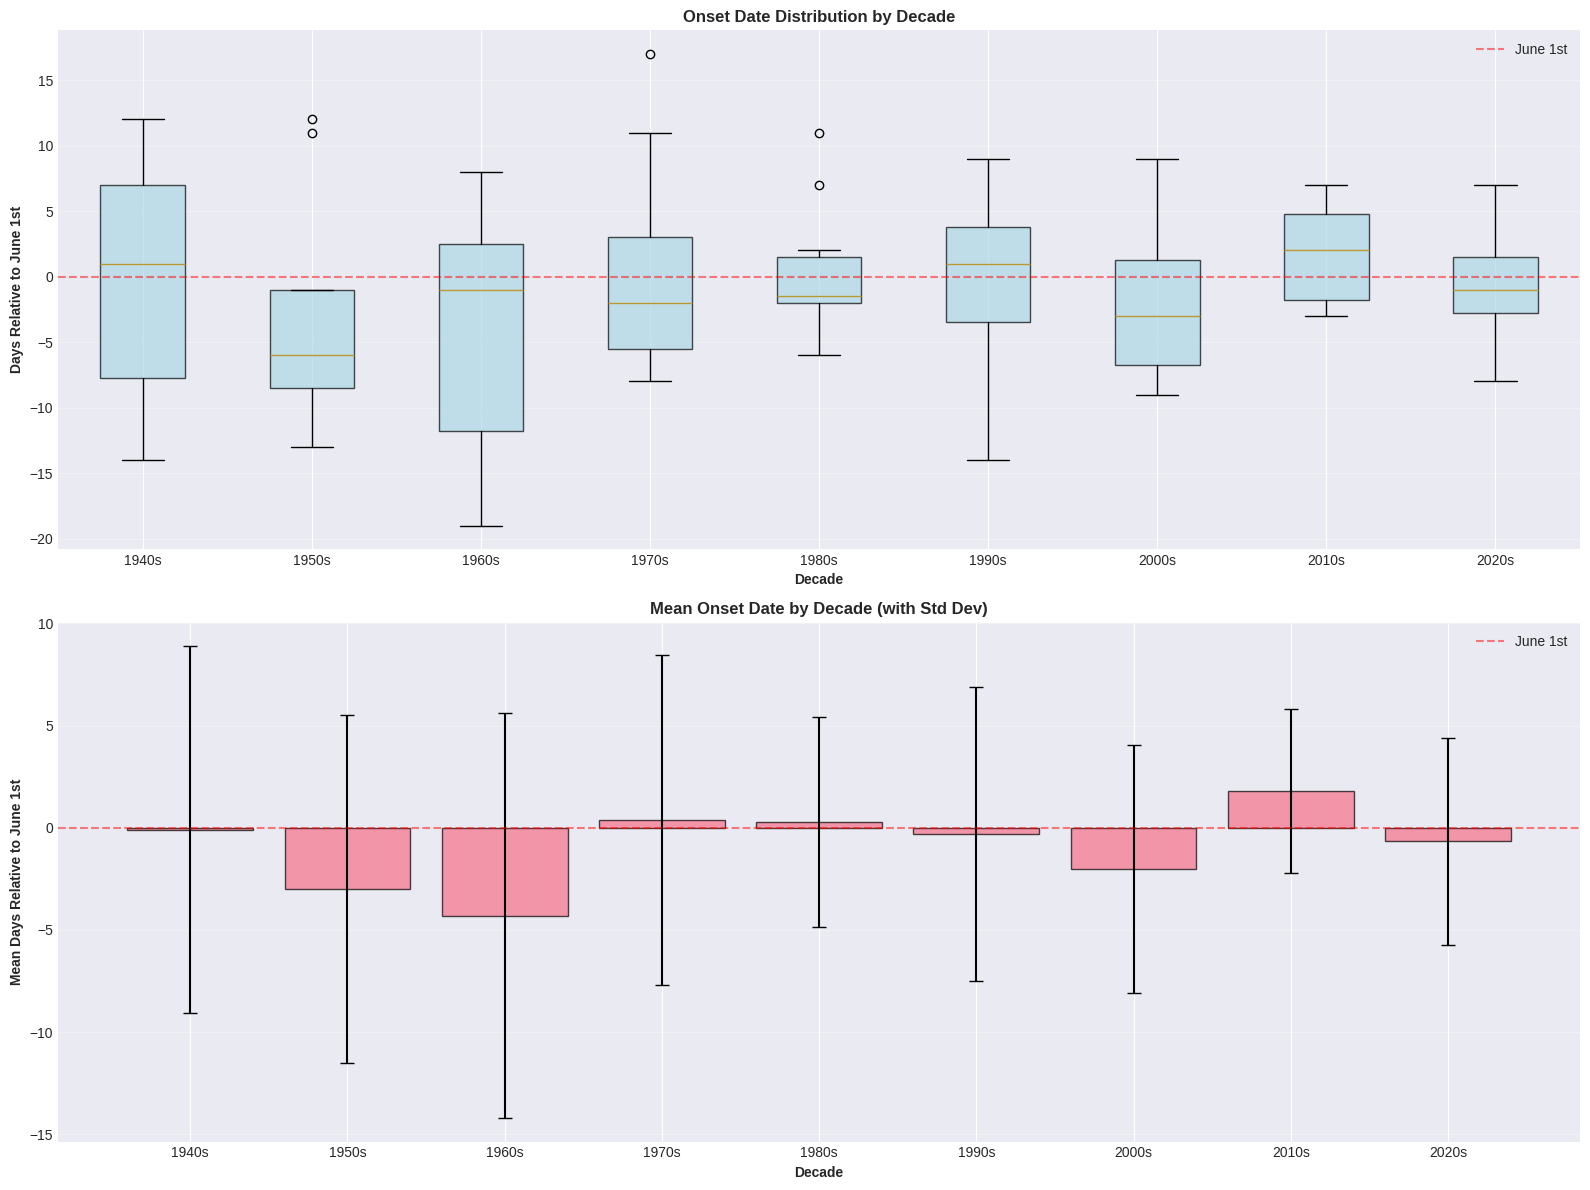

In [16]:
# Decade-wise analysis
df['Decade'] = (df['Year'] // 10) * 10

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Box plot by decade
decade_data = [df[df['Decade'] == d]['DateRelJun01'].values for d in sorted(df['Decade'].unique())]
decade_labels = [f"{int(d)}s" for d in sorted(df['Decade'].unique())]

bp = axes[0].boxplot(decade_data, labels=decade_labels, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='June 1st')
axes[0].set_xlabel('Decade', fontweight='bold')
axes[0].set_ylabel('Days Relative to June 1st', fontweight='bold')
axes[0].set_title('Onset Date Distribution by Decade', fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Bar plot of decade means
decade_stats = df.groupby('Decade')['DateRelJun01'].agg(['mean', 'std']).reset_index()
x_pos = range(len(decade_stats))

axes[1].bar(x_pos, decade_stats['mean'], yerr=decade_stats['std'], 
            capsize=5, alpha=0.7, edgecolor='black')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='June 1st')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(decade_labels)
axes[1].set_xlabel('Decade', fontweight='bold')
axes[1].set_ylabel('Mean Days Relative to June 1st', fontweight='bold')
axes[1].set_title('Mean Onset Date by Decade (with Std Dev)', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [18]:
# Decade-wise statistics table
print("\n" + "="*80)
print("DECADE-WISE STATISTICS")
print("="*80)
decade_summary = df.groupby('Decade')['DateRelJun01'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)
decade_summary.index = [f"{int(d)}s" for d in decade_summary.index]
print(decade_summary)


DECADE-WISE STATISTICS
       Count  Mean  Median  Std Dev   Min   Max
1940s     10 -0.10     1.0     8.97 -14.0  12.0
1950s     10 -3.00    -6.0     8.50 -13.0  12.0
1960s     10 -4.30    -1.0     9.90 -19.0   8.0
1970s     10  0.40    -2.0     8.07  -8.0  17.0
1980s     10  0.30    -1.5     5.14  -6.0  11.0
1990s     10 -0.30     1.0     7.21 -14.0   9.0
2000s     10 -2.00    -3.0     6.07  -9.0   9.0
2010s     10  1.80     2.0     4.02  -3.0   7.0
2020s      6 -0.67    -1.0     5.05  -8.0   7.0


## 7. Trend Analysis

In [ ]:
# Linear trend analysis
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['DateRelJun01'])

# Generate trend line
trend_line = slope * df['Year'] + intercept

# Plot
fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(df['Year'], df['DateRelJun01'], alpha=0.6, s=50, label='Actual Data')
ax.plot(df['Year'], trend_line, 'r-', linewidth=2.5, label=f'Linear Trend (slope={slope:.4f})')
ax.axhline(y=0, color='green', linestyle='--', alpha=0.5, label='June 1st')

# Add equation and statistics
equation_text = f"y = {slope:.4f}x + {intercept:.2f}\nR² = {r_value**2:.4f}\np-value = {p_value:.4f}"
ax.text(0.02, 0.98, equation_text, transform=ax.transAxes, 
        fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Days Relative to June 1st', fontsize=12, fontweight='bold')
ax.set_title('Linear Trend Analysis of MoK Onset Dates', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print interpretation
print("\n" + "="*60)
print("TREND ANALYSIS RESULTS")
print("="*60)
print(f"Slope: {slope:.6f} days/year")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.6f}")

if p_value < 0.05:
    trend_direction = "delayed" if slope > 0 else "earlier"
    print(f"\n✓ Significant trend detected: Monsoon onset is becoming {trend_direction} over time")
else:
    print(f"\n✗ No significant trend detected (p > 0.05)")

# Calculate change over the period
years_span = df['Year'].max() - df['Year'].min()
total_change = slope * years_span
print(f"\nEstimated change from {df['Year'].min():.0f} to {df['Year'].max():.0f}: {total_change:.2f} days")

## 8. Autocorrelation Analysis

In [ ]:
# Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Autocorrelation Function (ACF)
plot_acf(df['DateRelJun01'], lags=20, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Lag', fontweight='bold')
axes[0].set_ylabel('Autocorrelation', fontweight='bold')

# Partial Autocorrelation Function (PACF)
plot_pacf(df['DateRelJun01'], lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Lag', fontweight='bold')
axes[1].set_ylabel('Partial Autocorrelation', fontweight='bold')

plt.tight_layout()
plt.show()

## 9. Split-wise Analysis

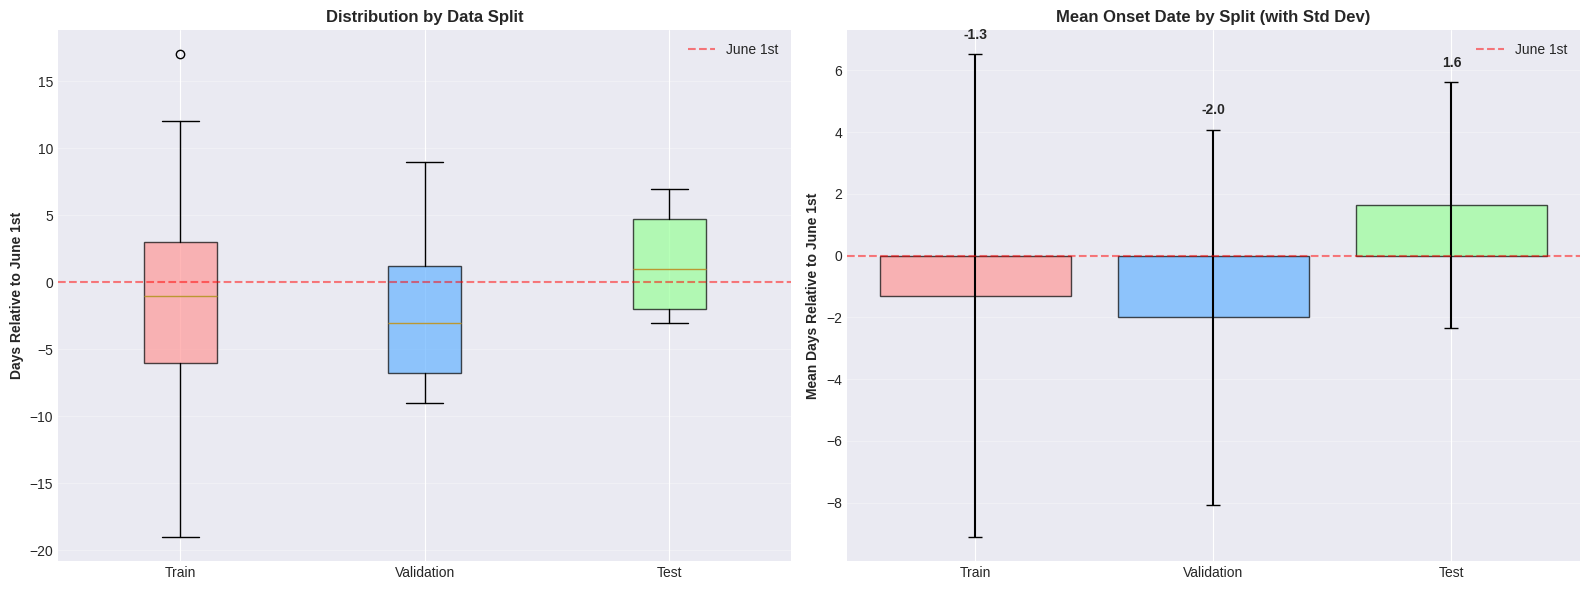

In [28]:
# Compare statistics across train/val/test splits
df['Split'] = 'Other'
df.loc[train_mask, 'Split'] = 'Train'
df.loc[val_mask, 'Split'] = 'Validation'
df.loc[test_mask, 'Split'] = 'Test'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot by split
split_order = ['Train', 'Validation', 'Test']
split_data = [df[df['Split'] == s]['DateRelJun01'].values for s in split_order]

bp = axes[0].boxplot(split_data, labels=split_order, patch_artist=True)
colors = ['#ff9999', '#66b3ff', '#99ff99']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='June 1st')
axes[0].set_ylabel('Days Relative to June 1st', fontweight='bold')
axes[0].set_title('Distribution by Data Split', fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Bar plot of means
split_stats = df[df['Split'].isin(split_order)].groupby('Split')['DateRelJun01'].agg(['mean', 'std'])
split_stats = split_stats.reindex(split_order)

x_pos = range(len(split_stats))
axes[1].bar(x_pos, split_stats['mean'], yerr=split_stats['std'], 
            capsize=5, alpha=0.7, edgecolor='black', color=colors)
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='June 1st')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(split_order)
axes[1].set_ylabel('Mean Days Relative to June 1st', fontweight='bold')
axes[1].set_title('Mean Onset Date by Split (with Std Dev)', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (mean, std) in enumerate(zip(split_stats['mean'], split_stats['std'])):
    axes[1].text(i, mean + std + 0.5, f'{mean:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Split-wise statistics table
print("\n" + "="*80)
print("SPLIT-WISE STATISTICS")
print("="*80)
split_summary = df[df['Split'].isin(split_order)].groupby('Split')['DateRelJun01'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Range', lambda x: x.max() - x.min())
]).round(2)
split_summary = split_summary.reindex(split_order)
print(split_summary)

# Check for distribution shift
from scipy.stats import ks_2samp
print("\n" + "="*80)
print("DISTRIBUTION SHIFT TESTS (Kolmogorov-Smirnov)")
print("="*80)

train_data = df[train_mask]['DateRelJun01']
val_data = df[val_mask]['DateRelJun01']
test_data = df[test_mask]['DateRelJun01']

ks_stat_tv, ks_p_tv = ks_2samp(train_data, val_data)
ks_stat_tt, ks_p_tt = ks_2samp(train_data, test_data)

print(f"\nTrain vs Validation:")
print(f"  KS Statistic: {ks_stat_tv:.4f}")
print(f"  P-value: {ks_p_tv:.4f}")
print(f"  Result: {'Significantly different' if ks_p_tv < 0.05 else 'Not significantly different'} (α=0.05)")

print(f"\nTrain vs Test:")
print(f"  KS Statistic: {ks_stat_tt:.4f}")
print(f"  P-value: {ks_p_tt:.4f}")
print(f"  Result: {'Significantly different' if ks_p_tt < 0.05 else 'Not significantly different'} (α=0.05)")

## 10. Outlier Analysis

In [ ]:
# Identify outliers using IQR method
Q1 = df['DateRelJun01'].quantile(0.25)
Q3 = df['DateRelJun01'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['DateRelJun01'] < lower_bound) | (df['DateRelJun01'] > upper_bound)]

print("="*60)
print("OUTLIER ANALYSIS (IQR Method)")
print("="*60)
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

if len(outliers) > 0:
    print(f"\nOutlier years and values:")
    for _, row in outliers.sort_values('DateRelJun01').iterrows():
        print(f"  {row['Year']:.0f}: {row['DateRelJun01']:6.0f} days ({row['DateString']})")

In [ ]:
# Visualize outliers
fig, ax = plt.subplots(figsize=(16, 6))

# Plot all data
ax.scatter(df['Year'], df['DateRelJun01'], alpha=0.5, s=50, label='Normal')

# Highlight outliers
if len(outliers) > 0:
    ax.scatter(outliers['Year'], outliers['DateRelJun01'], 
              color='red', s=100, marker='X', label='Outliers', zorder=5)
    
    # Annotate outliers
    for _, row in outliers.iterrows():
        ax.annotate(f"{row['Year']:.0f}\n{row['DateRelJun01']:.0f}d", 
                   xy=(row['Year'], row['DateRelJun01']),
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=8, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add bounds
ax.axhline(y=lower_bound, color='orange', linestyle='--', alpha=0.5, label=f'Lower Bound ({lower_bound:.1f})')
ax.axhline(y=upper_bound, color='orange', linestyle='--', alpha=0.5, label=f'Upper Bound ({upper_bound:.1f})')
ax.axhline(y=0, color='green', linestyle='--', alpha=0.5, label='June 1st')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Days Relative to June 1st', fontsize=12, fontweight='bold')
ax.set_title('Outlier Detection in MoK Onset Dates', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Summary and Key Insights

In [ ]:
print("="*80)
print("SUMMARY OF KEY INSIGHTS")
print("="*80)

print(f"\n1. DATA OVERVIEW")
print(f"   • Total observations: {len(df)}")
print(f"   • Time span: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"   • Date range: {df['DateString'].iloc[df['DateRelJun01'].idxmin()]} to {df['DateString'].iloc[df['DateRelJun01'].idxmax()]}")

print(f"\n2. CENTRAL TENDENCY")
print(f"   • Mean: {df['DateRelJun01'].mean():.2f} days relative to June 1st")
print(f"   • Median: {df['DateRelJun01'].median():.2f} days")
print(f"   • Mode: {df['DateRelJun01'].mode().values[0]:.0f} days")

print(f"\n3. VARIABILITY")
print(f"   • Standard deviation: {df['DateRelJun01'].std():.2f} days")
print(f"   • Range: {df['DateRelJun01'].max() - df['DateRelJun01'].min():.0f} days")
print(f"   • IQR: {IQR:.2f} days")

print(f"\n4. DISTRIBUTION SHAPE")
print(f"   • Skewness: {df['DateRelJun01'].skew():.4f} ({'right-skewed' if df['DateRelJun01'].skew() > 0 else 'left-skewed'})")
print(f"   • Kurtosis: {df['DateRelJun01'].kurtosis():.4f} ({'leptokurtic (heavy tails)' if df['DateRelJun01'].kurtosis() > 0 else 'platykurtic (light tails)'})")
print(f"   • Normality: {'Approximately normal' if shapiro_p > 0.05 else 'Not normal'} (Shapiro-Wilk p={shapiro_p:.4f})")

print(f"\n5. TEMPORAL TRENDS")
trend_direction = "delayed" if slope > 0 else "earlier"
trend_significance = "significant" if p_value < 0.05 else "not significant"
print(f"   • Linear trend: {slope:.6f} days/year ({trend_direction})")
print(f"   • Trend significance: {trend_significance} (p={p_value:.4f})")
print(f"   • Total change ({df['Year'].min():.0f}-{df['Year'].max():.0f}): {total_change:.2f} days")

print(f"\n6. ONSET TIMING CATEGORIES")
print(f"   • Early (before Jun 1): {early_onset} years ({early_onset/len(df)*100:.1f}%)")
print(f"   • On-time (Jun 1): {on_time} years ({on_time/len(df)*100:.1f}%)")
print(f"   • Late (after Jun 1): {late_onset} years ({late_onset/len(df)*100:.1f}%)")

print(f"\n7. OUTLIERS")
print(f"   • Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
if len(outliers) > 0:
    extreme_early = outliers.loc[outliers['DateRelJun01'].idxmin()]
    extreme_late = outliers.loc[outliers['DateRelJun01'].idxmax()]
    print(f"   • Most extreme early: {extreme_early['Year']:.0f} ({extreme_early['DateRelJun01']:.0f} days, {extreme_early['DateString']})")
    print(f"   • Most extreme late: {extreme_late['Year']:.0f} ({extreme_late['DateRelJun01']:.0f} days, {extreme_late['DateString']})")

print(f"\n8. DATA SPLITS")
for split in split_order:
    split_df = df[df['Split'] == split]
    print(f"   • {split}: {len(split_df)} samples, mean={split_df['DateRelJun01'].mean():.2f}d, std={split_df['DateRelJun01'].std():.2f}d")

print(f"\n9. DISTRIBUTION SHIFT")
print(f"   • Train vs Validation: {'Significantly different' if ks_p_tv < 0.05 else 'Similar'} (KS p={ks_p_tv:.4f})")
print(f"   • Train vs Test: {'Significantly different' if ks_p_tt < 0.05 else 'Similar'} (KS p={ks_p_tt:.4f})")

print("\n" + "="*80)

## Conclusions

This notebook provides a comprehensive analysis of the MoK onset dates from 1940-2025. Key findings:

1. **Target Variable Range**: The onset dates vary significantly, with extremes from May to July
2. **Distribution**: The data shows specific characteristics in terms of skewness and kurtosis
3. **Temporal Patterns**: Analysis reveals any trends or patterns over the decades
4. **Data Quality**: Outlier analysis helps identify unusual years
5. **Model Implications**: Split-wise analysis ensures fair train/validation/test distribution

These visualizations and statistics provide valuable context for:
- Model training and evaluation
- Understanding prediction challenges
- Identifying potential biases or shifts in the data
- Setting realistic performance expectations

## 12. Binned Analysis of Onset Dates

In this section, we create meaningful bins for onset dates to better understand the distribution patterns:
- **On or Before May 20**: Very early onset (≤ May 20)
- **May 21-24**: Early onset
- **May 25-27**: Moderately early
- **May 28-30**: Slightly early
- **May 31-June 2**: Normal/on-time
- **June 3-5**: Slightly late
- **June 6-8**: Moderately late
- **June 9-12**: Late onset
- **After June 12**: Very late onset

In [29]:
# Define bins based on days relative to June 1st
# May 20 = -12 days, May 21 = -11 days, May 24 = -8 days, May 25 = -7 days
# May 27 = -5 days, May 28 = -4 days, May 30 = -2 days, May 31 = -1 day
# June 1 = 0 days, June 2 = +1 day, June 3 = +2 days, June 5 = +4 days
# June 6 = +5 days, June 8 = +7 days, June 9 = +8 days, June 12 = +11 days

# Using pandas.cut with right=True (default): bins are (lower, upper]
# So we need edges that create: ≤-12, (-12,-8], (-8,-5], (-5,-2], (-2,+1], (+1,+4], (+4,+7], (+7,+11], >+11
bin_edges = [-np.inf, -12, -8, -5, -2, 1, 4, 7, 11, np.inf]
bin_labels = [
    'On/Before May 20\n(≤ -12d)',
    'May 21-24\n(-12 to -9d)',
    'May 25-27\n(-8 to -6d)',
    'May 28-30\n(-5 to -3d)',
    'May 31-Jun 2\n(-2 to +1d)',
    'June 3-5\n(+2 to +4d)',
    'June 6-8\n(+5 to +7d)',
    'June 9-12\n(+8 to +11d)',
    'After June 12\n(> +11d)'
]

# Create binned categories
df['OnsetBin'] = pd.cut(df['DateRelJun01'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display bin distribution
print("="*80)
print("BINNED ONSET DATE DISTRIBUTION")
print("="*80)
bin_counts = df['OnsetBin'].value_counts().sort_index()
print("\nFrequency by bin:")
for bin_label, count in bin_counts.items():
    percentage = count / len(df) * 100
    print(f"  {bin_label:25s}: {count:3d} occurrences ({percentage:5.1f}%)")

print(f"\nTotal: {len(df)} observations")

BINNED ONSET DATE DISTRIBUTION

Frequency by bin:
  On/Before May 20
(≤ -12d):   6 occurrences (  7.0%)
  May 21-24
(-12 to -9d)   :  10 occurrences ( 11.6%)
  May 25-27
(-8 to -6d)    :   8 occurrences (  9.3%)
  May 28-30
(-5 to -3d)    :  15 occurrences ( 17.4%)
  May 31-Jun 2
(-2 to +1d) :  18 occurrences ( 20.9%)
  June 3-5
(+2 to +4d)     :  10 occurrences ( 11.6%)
  June 6-8
(+5 to +7d)     :   7 occurrences (  8.1%)
  June 9-12
(+8 to +11d)   :   9 occurrences ( 10.5%)
  After June 12
(> +11d)   :   3 occurrences (  3.5%)

Total: 86 observations


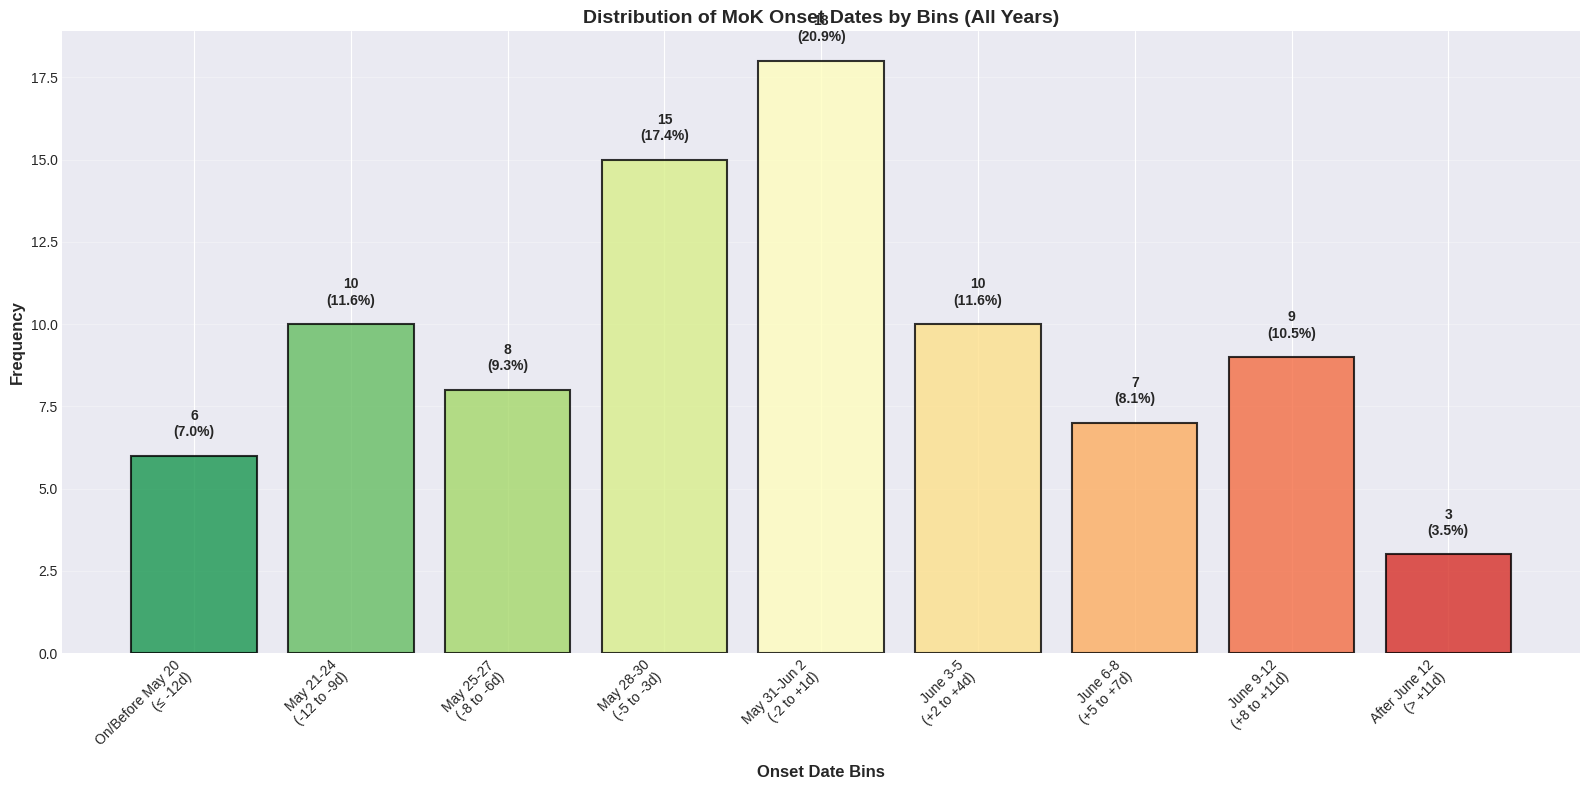

In [30]:
# Overall histogram of binned data
fig, ax = plt.subplots(figsize=(16, 8))

bin_counts_ordered = df['OnsetBin'].value_counts().reindex(bin_labels, fill_value=0)

# Create color gradient
colors_palette = plt.cm.RdYlGn_r(np.linspace(0.1, 0.9, len(bin_labels)))

bars = ax.bar(range(len(bin_labels)), bin_counts_ordered.values, 
               color=colors_palette, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, bin_counts_ordered.values)):
    height = bar.get_height()
    percentage = count / len(df) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(count)}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=45, ha='right', fontsize=10)
ax.set_xlabel('Onset Date Bins', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Distribution of MoK Onset Dates by Bins (All Years)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 12.1 Binned Distribution by Decade

In [31]:
# Binned distribution by decade
decades = sorted(df['Decade'].unique())
decade_labels_list = [f"{int(d)}s" for d in decades]

# Create a cross-tabulation
decade_bin_crosstab = pd.crosstab(df['Decade'], df['OnsetBin'])
decade_bin_crosstab = decade_bin_crosstab.reindex(columns=bin_labels, fill_value=0)
decade_bin_crosstab.index = decade_labels_list

print("="*100)
print("ONSET DATE BIN DISTRIBUTION BY DECADE (Count)")
print("="*100)
print(decade_bin_crosstab)

# Percentage within each decade
decade_bin_pct = pd.crosstab(df['Decade'], df['OnsetBin'], normalize='index') * 100
decade_bin_pct = decade_bin_pct.reindex(columns=bin_labels, fill_value=0)
decade_bin_pct.index = decade_labels_list

print("\n" + "="*100)
print("ONSET DATE BIN DISTRIBUTION BY DECADE (Percentage)")
print("="*100)
print(decade_bin_pct.round(1))

ONSET DATE BIN DISTRIBUTION BY DECADE (Count)
OnsetBin  On/Before May 20\n(≤ -12d)  May 21-24\n(-12 to -9d)  \
1940s                              1                        2   
1950s                              1                        2   
1960s                              3                        1   
1970s                              0                        1   
1980s                              0                        0   
1990s                              1                        1   
2000s                              0                        2   
2010s                              0                        0   
2020s                              0                        1   

OnsetBin  May 25-27\n(-8 to -6d)  May 28-30\n(-5 to -3d)  \
1940s                          0                       0   
1950s                          3                       0   
1960s                          0                       0   
1970s                          2                       2   
198

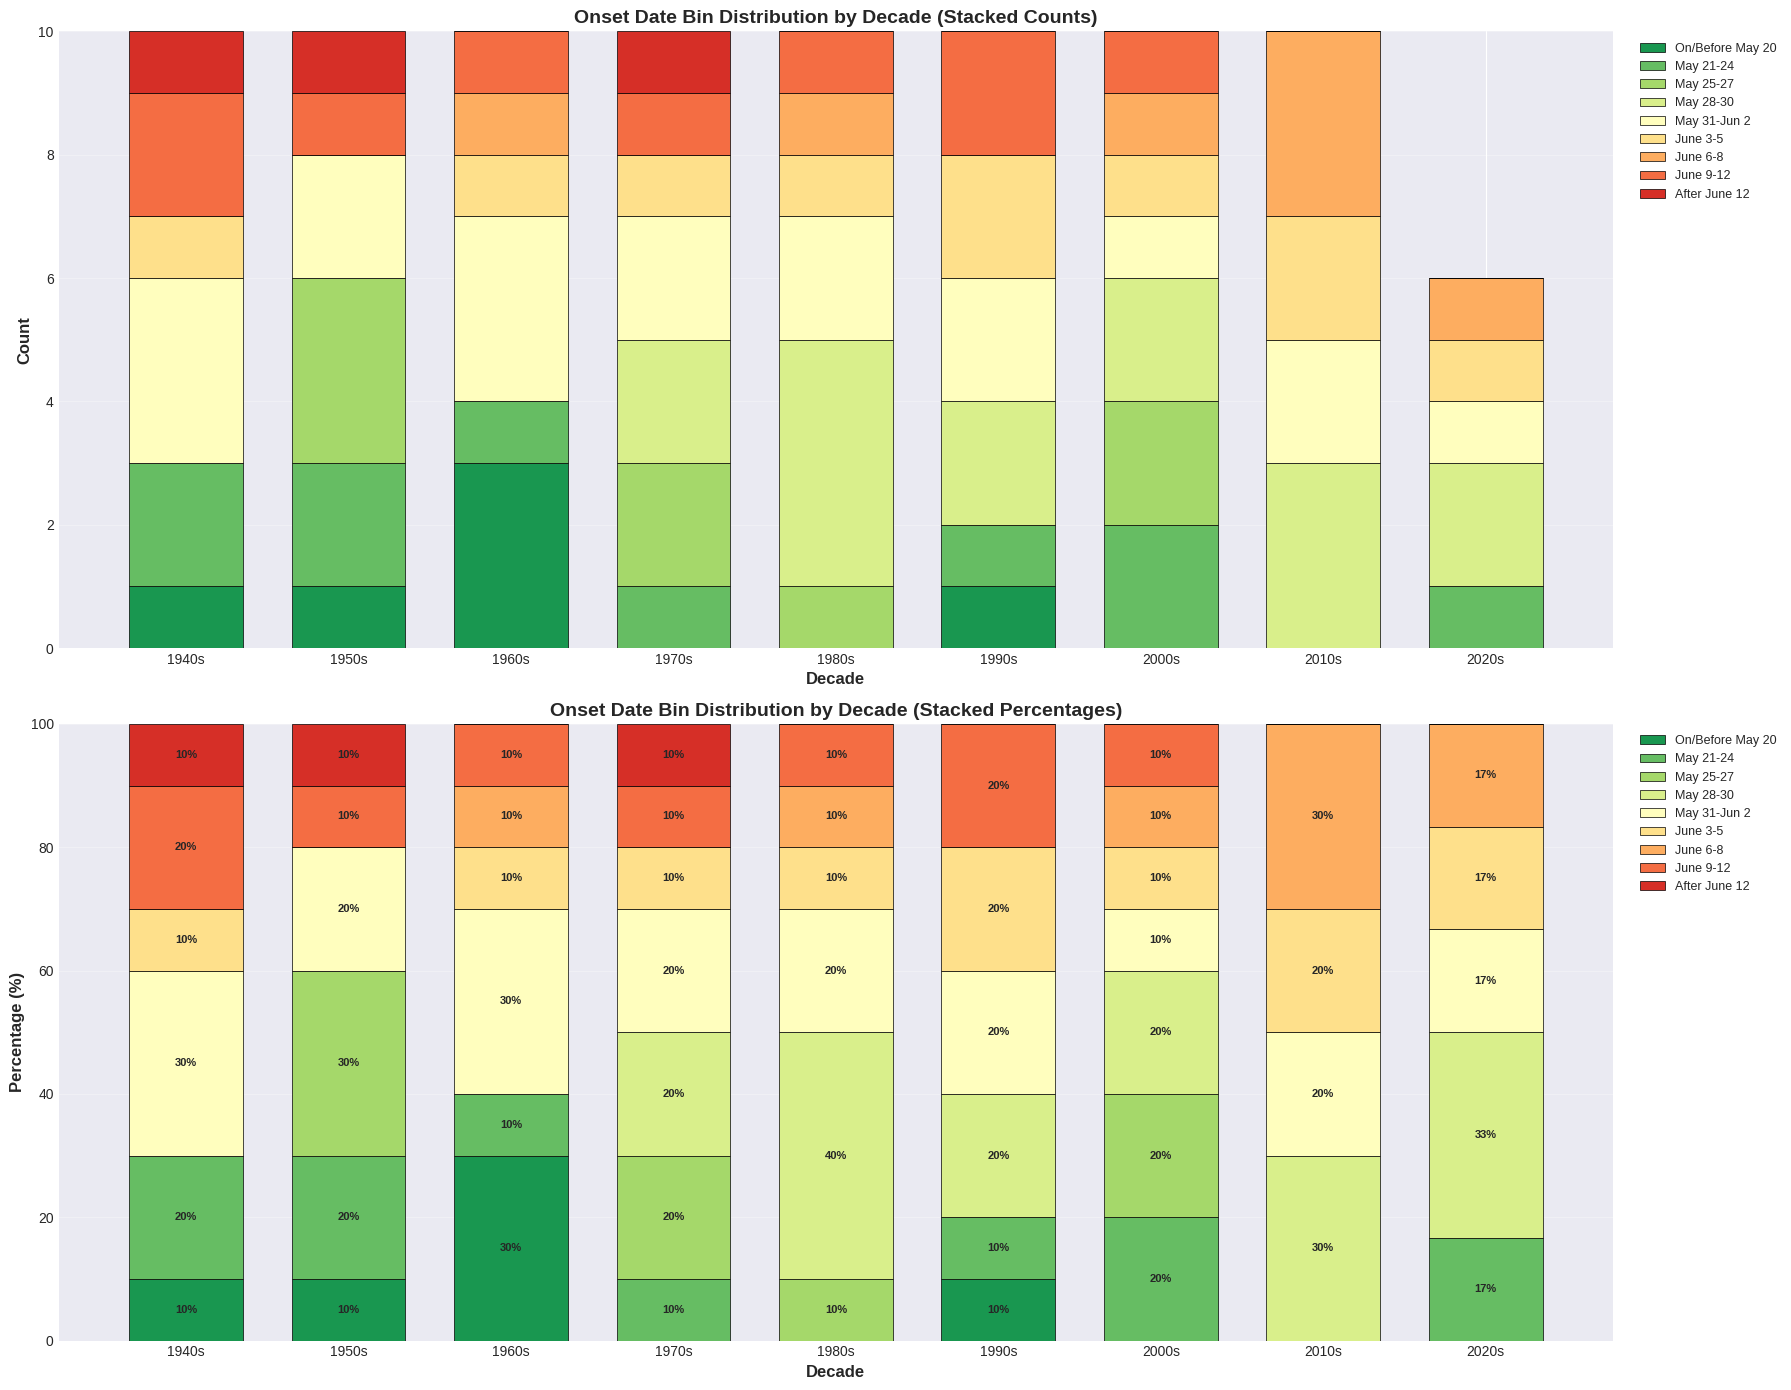

In [32]:
# Stacked bar chart by decade
fig, axes = plt.subplots(2, 1, figsize=(18, 14))

# Prepare data for plotting
x_pos = np.arange(len(decade_labels_list))
width = 0.7

# Plot 1: Stacked bar chart (counts)
bottom = np.zeros(len(decade_labels_list))
for i, bin_label in enumerate(bin_labels):
    values = decade_bin_crosstab[bin_label].values
    bars = axes[0].bar(x_pos, values, width, bottom=bottom, 
                       label=bin_label.split('\n')[0], 
                       color=colors_palette[i], edgecolor='black', linewidth=0.5)
    bottom += values

axes[0].set_xlabel('Decade', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Onset Date Bin Distribution by Decade (Stacked Counts)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(decade_labels_list)
axes[0].legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=9)
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Stacked bar chart (percentages)
bottom = np.zeros(len(decade_labels_list))
for i, bin_label in enumerate(bin_labels):
    values = decade_bin_pct[bin_label].values
    bars = axes[1].bar(x_pos, values, width, bottom=bottom,
                       label=bin_label.split('\n')[0],
                       color=colors_palette[i], edgecolor='black', linewidth=0.5)
    
    # Add percentage labels for significant values
    for j, (bar, val) in enumerate(zip(bars, values)):
        if val > 5:  # Only label if > 5%
            axes[1].text(bar.get_x() + bar.get_width()/2., 
                        bottom[j] + val/2,
                        f'{val:.0f}%',
                        ha='center', va='center', fontsize=8, fontweight='bold')
    
    bottom += values

axes[1].set_xlabel('Decade', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Onset Date Bin Distribution by Decade (Stacked Percentages)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(decade_labels_list)
axes[1].legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=9)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()

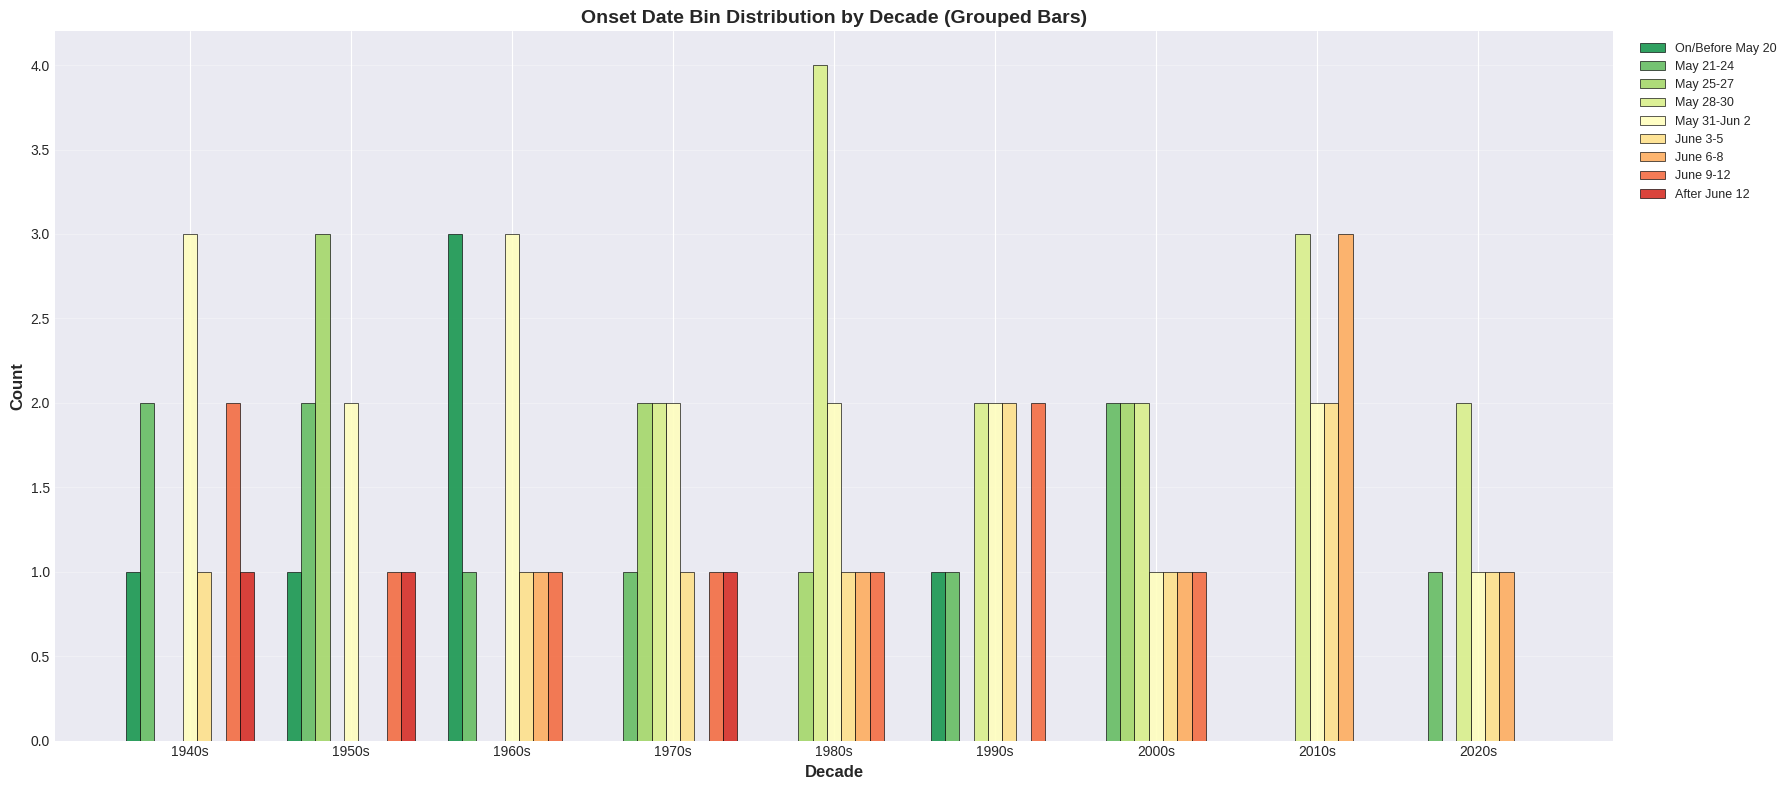

In [33]:
# Grouped bar chart by decade (better for comparison across bins)
fig, ax = plt.subplots(figsize=(18, 8))

n_bins = len(bin_labels)
n_decades = len(decade_labels_list)
width = 0.8 / n_bins
x = np.arange(n_decades)

for i, bin_label in enumerate(bin_labels):
    offset = (i - n_bins/2) * width + width/2
    values = decade_bin_crosstab[bin_label].values
    bars = ax.bar(x + offset, values, width, label=bin_label.split('\n')[0], 
                  color=colors_palette[i], edgecolor='black', linewidth=0.5, alpha=0.9)

ax.set_xlabel('Decade', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Onset Date Bin Distribution by Decade (Grouped Bars)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(decade_labels_list)
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=9)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 12.2 Binned Distribution by Data Split (Train/Validation/Test)

In [34]:
# Binned distribution by data split
split_order = ['Train', 'Validation', 'Test']

# Create cross-tabulation
split_bin_crosstab = pd.crosstab(df['Split'], df['OnsetBin'])
split_bin_crosstab = split_bin_crosstab.reindex(index=split_order, columns=bin_labels, fill_value=0)

print("="*100)
print("ONSET DATE BIN DISTRIBUTION BY DATA SPLIT (Count)")
print("="*100)
print(split_bin_crosstab)

# Percentage within each split
split_bin_pct = pd.crosstab(df['Split'], df['OnsetBin'], normalize='index') * 100
split_bin_pct = split_bin_pct.reindex(index=split_order, columns=bin_labels, fill_value=0)

print("\n" + "="*100)
print("ONSET DATE BIN DISTRIBUTION BY DATA SPLIT (Percentage)")
print("="*100)
print(split_bin_pct.round(1))

ONSET DATE BIN DISTRIBUTION BY DATA SPLIT (Count)
OnsetBin    On/Before May 20\n(≤ -12d)  May 21-24\n(-12 to -9d)  \
Split                                                             
Train                                5                        5   
Validation                           0                        2   
Test                                 0                        0   

OnsetBin    May 25-27\n(-8 to -6d)  May 28-30\n(-5 to -3d)  \
Split                                                        
Train                            5                       8   
Validation                       2                       2   
Test                             0                       5   

OnsetBin    May 31-Jun 2\n(-2 to +1d)  June 3-5\n(+2 to +4d)  \
Split                                                          
Train                              12                      5   
Validation                          1                      1   
Test                                2          

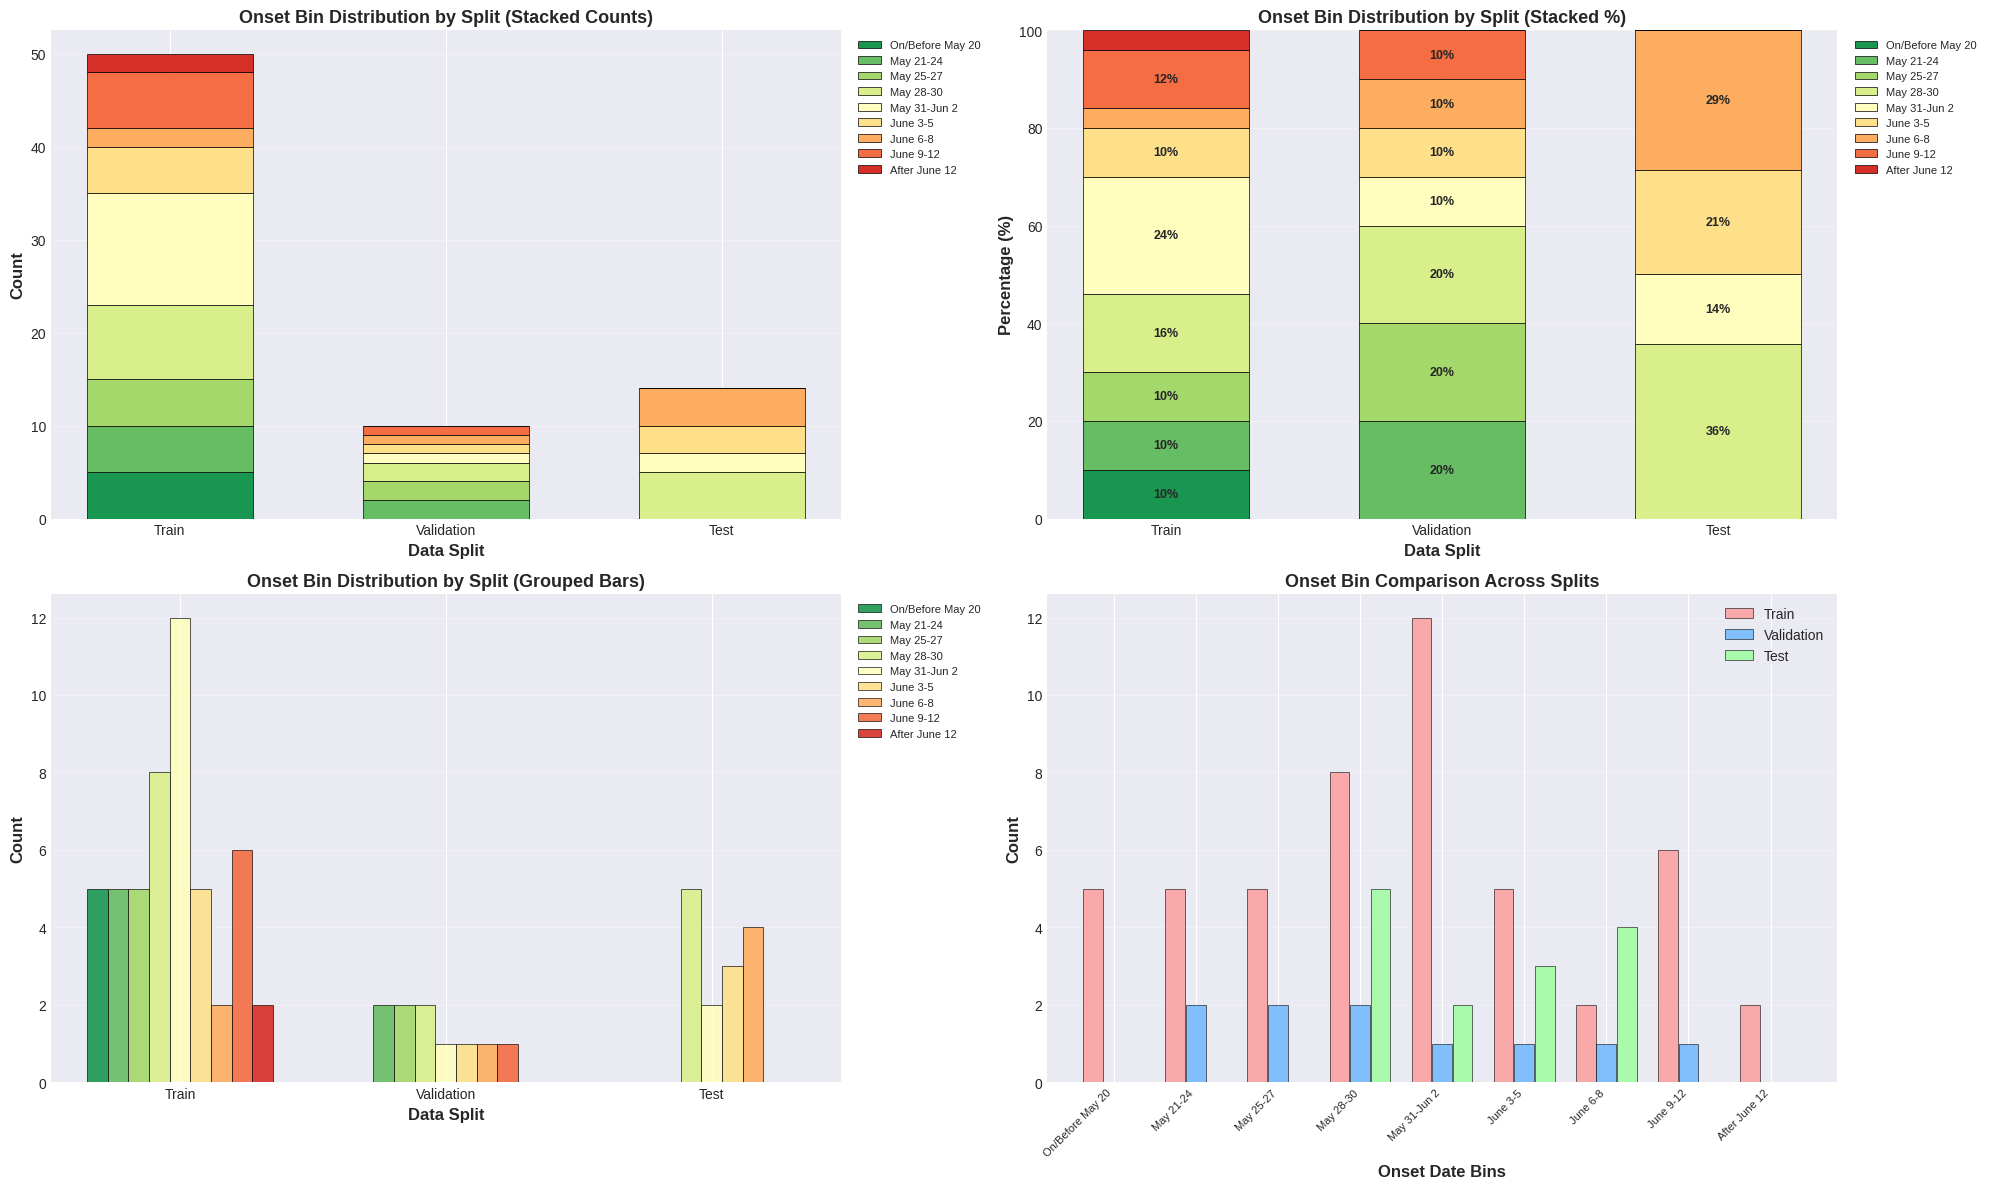

In [35]:
# Visualize split distributions
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

split_colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plot 1: Stacked bar chart by split (counts)
x_pos = np.arange(len(split_order))
width = 0.6

bottom = np.zeros(len(split_order))
for i, bin_label in enumerate(bin_labels):
    values = split_bin_crosstab[bin_label].values
    bars = axes[0, 0].bar(x_pos, values, width, bottom=bottom,
                          label=bin_label.split('\n')[0],
                          color=colors_palette[i], edgecolor='black', linewidth=0.5)
    bottom += values

axes[0, 0].set_xlabel('Data Split', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Onset Bin Distribution by Split (Stacked Counts)', fontsize=13, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(split_order)
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=8)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Plot 2: Stacked bar chart by split (percentages)
bottom = np.zeros(len(split_order))
for i, bin_label in enumerate(bin_labels):
    values = split_bin_pct[bin_label].values
    bars = axes[0, 1].bar(x_pos, values, width, bottom=bottom,
                          label=bin_label.split('\n')[0],
                          color=colors_palette[i], edgecolor='black', linewidth=0.5)
    
    # Add percentage labels
    for j, (bar, val) in enumerate(zip(bars, values)):
        if val > 5:
            axes[0, 1].text(bar.get_x() + bar.get_width()/2.,
                           bottom[j] + val/2,
                           f'{val:.0f}%',
                           ha='center', va='center', fontsize=9, fontweight='bold')
    
    bottom += values

axes[0, 1].set_xlabel('Data Split', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Onset Bin Distribution by Split (Stacked %)', fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(split_order)
axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=8)
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_ylim([0, 100])

# Plot 3: Grouped bar chart by split
n_bins = len(bin_labels)
n_splits = len(split_order)
width_grouped = 0.7 / n_bins
x = np.arange(n_splits)

for i, bin_label in enumerate(bin_labels):
    offset = (i - n_bins/2) * width_grouped + width_grouped/2
    values = split_bin_crosstab[bin_label].values
    bars = axes[1, 0].bar(x + offset, values, width_grouped,
                          label=bin_label.split('\n')[0],
                          color=colors_palette[i], edgecolor='black', linewidth=0.5, alpha=0.9)

axes[1, 0].set_xlabel('Data Split', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Onset Bin Distribution by Split (Grouped Bars)', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(split_order)
axes[1, 0].legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=8)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Side-by-side comparison for each split (separate histograms)
for idx, split in enumerate(split_order):
    split_data = df[df['Split'] == split]['OnsetBin'].value_counts().reindex(bin_labels, fill_value=0)
    x_plot = np.arange(len(bin_labels))
    axes[1, 1].bar(x_plot + idx*0.25, split_data.values, width=0.24,
                   label=split, color=split_colors[idx], edgecolor='black',
                   linewidth=0.5, alpha=0.8)

axes[1, 1].set_xlabel('Onset Date Bins', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Onset Bin Comparison Across Splits', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(x_plot + 0.25)
axes[1, 1].set_xticklabels([label.split('\n')[0] for label in bin_labels], rotation=45, ha='right', fontsize=8)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 12.3 Heatmap Visualizations

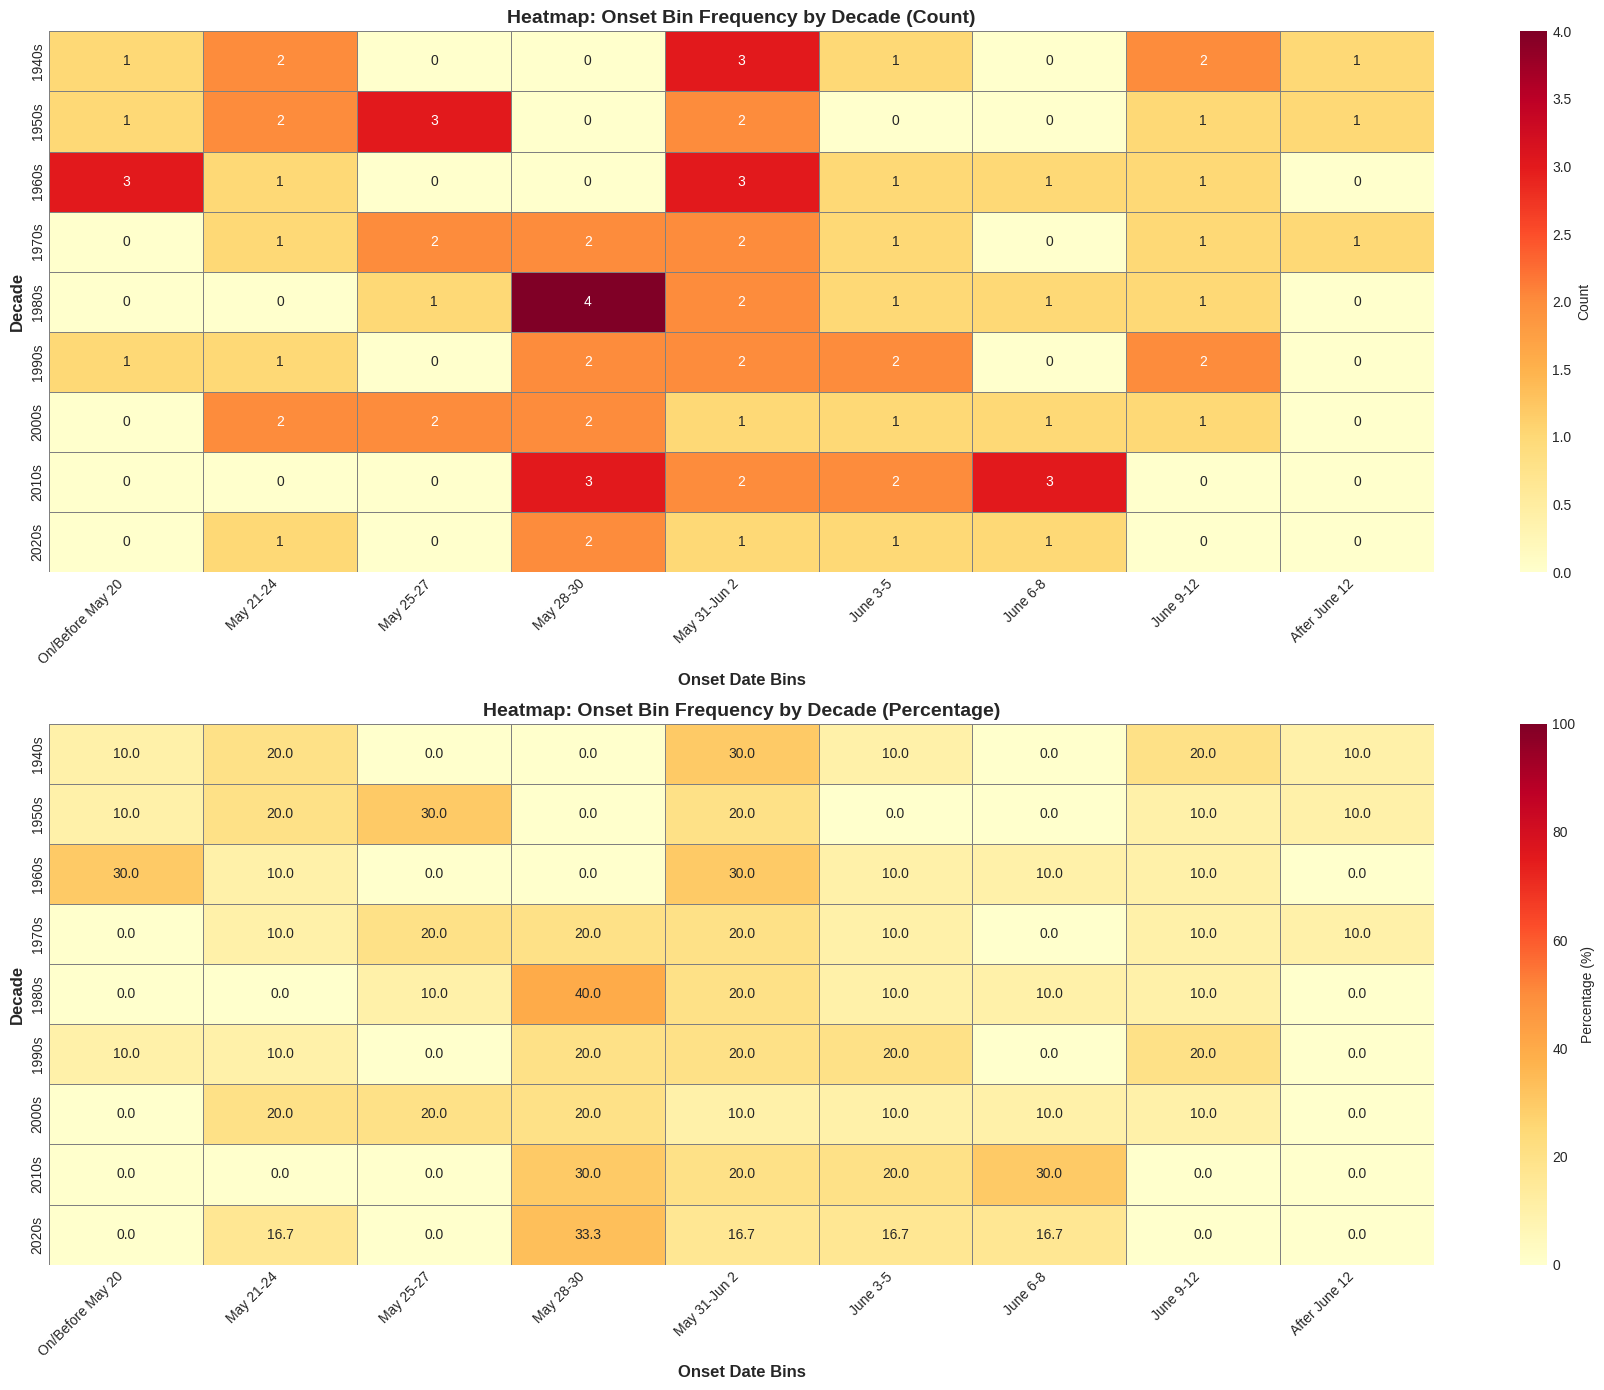

In [36]:
# Heatmap visualizations
fig, axes = plt.subplots(2, 1, figsize=(18, 14))

# Heatmap 1: Decade vs Bins (counts)
sns.heatmap(decade_bin_crosstab, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray',
            ax=axes[0])
axes[0].set_xlabel('Onset Date Bins', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Decade', fontsize=12, fontweight='bold')
axes[0].set_title('Heatmap: Onset Bin Frequency by Decade (Count)', fontsize=14, fontweight='bold')
axes[0].set_xticklabels([label.split('\n')[0] for label in bin_labels], rotation=45, ha='right')

# Heatmap 2: Decade vs Bins (percentages)
sns.heatmap(decade_bin_pct, annot=True, fmt='.1f', cmap='YlOrRd',
            cbar_kws={'label': 'Percentage (%)'}, linewidths=0.5, linecolor='gray',
            ax=axes[1], vmin=0, vmax=100)
axes[1].set_xlabel('Onset Date Bins', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Decade', fontsize=12, fontweight='bold')
axes[1].set_title('Heatmap: Onset Bin Frequency by Decade (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels([label.split('\n')[0] for label in bin_labels], rotation=45, ha='right')

plt.tight_layout()
plt.show()

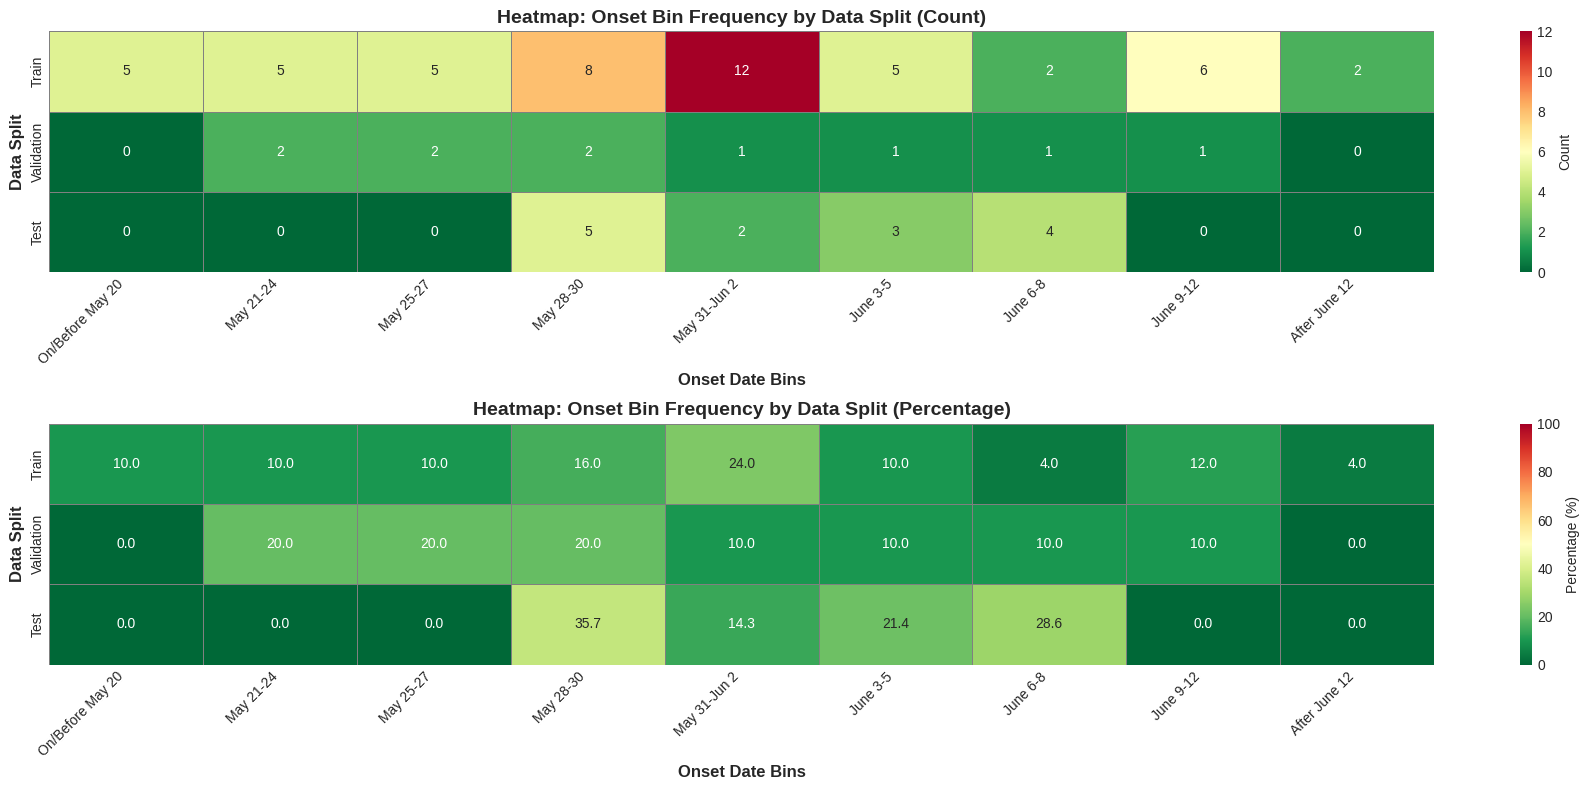

In [37]:
# Heatmap for data splits
fig, axes = plt.subplots(2, 1, figsize=(18, 8))

# Heatmap 1: Split vs Bins (counts)
sns.heatmap(split_bin_crosstab, annot=True, fmt='d', cmap='RdYlGn_r',
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray',
            ax=axes[0])
axes[0].set_xlabel('Onset Date Bins', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Data Split', fontsize=12, fontweight='bold')
axes[0].set_title('Heatmap: Onset Bin Frequency by Data Split (Count)', fontsize=14, fontweight='bold')
axes[0].set_xticklabels([label.split('\n')[0] for label in bin_labels], rotation=45, ha='right')

# Heatmap 2: Split vs Bins (percentages)
sns.heatmap(split_bin_pct, annot=True, fmt='.1f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Percentage (%)'}, linewidths=0.5, linecolor='gray',
            ax=axes[1], vmin=0, vmax=100)
axes[1].set_xlabel('Onset Date Bins', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Data Split', fontsize=12, fontweight='bold')
axes[1].set_title('Heatmap: Onset Bin Frequency by Data Split (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels([label.split('\n')[0] for label in bin_labels], rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 12.4 Statistical Analysis of Binned Data

In [38]:
# Statistical tests for bin distribution across splits
from scipy.stats import chi2_contingency

print("="*80)
print("CHI-SQUARE TEST FOR INDEPENDENCE")
print("="*80)

# Test 1: Split vs Bins
print("\n1. Testing if bin distribution is independent of data split:")
print("   H0: Bin distribution is independent of data split")
print("   H1: Bin distribution depends on data split")

chi2_split, p_split, dof_split, expected_split = chi2_contingency(split_bin_crosstab)

print(f"\n   Chi-square statistic: {chi2_split:.4f}")
print(f"   Degrees of freedom: {dof_split}")
print(f"   P-value: {p_split:.6f}")
print(f"   Result: {'REJECT H0' if p_split < 0.05 else 'FAIL TO REJECT H0'} (α=0.05)")

if p_split < 0.05:
    print("   → Bin distributions are significantly different across splits")
else:
    print("   → Bin distributions are similar across splits")

# Test 2: Decade vs Bins
print("\n2. Testing if bin distribution is independent of decade:")
print("   H0: Bin distribution is independent of decade")
print("   H1: Bin distribution depends on decade")

chi2_decade, p_decade, dof_decade, expected_decade = chi2_contingency(decade_bin_crosstab)

print(f"\n   Chi-square statistic: {chi2_decade:.4f}")
print(f"   Degrees of freedom: {dof_decade}")
print(f"   P-value: {p_decade:.6f}")
print(f"   Result: {'REJECT H0' if p_decade < 0.05 else 'FAIL TO REJECT H0'} (α=0.05)")

if p_decade < 0.05:
    print("   → Bin distributions have significantly changed over decades")
else:
    print("   → Bin distributions are consistent across decades")

print("\n" + "="*80)

CHI-SQUARE TEST FOR INDEPENDENCE

1. Testing if bin distribution is independent of data split:
   H0: Bin distribution is independent of data split
   H1: Bin distribution depends on data split

   Chi-square statistic: 21.4691
   Degrees of freedom: 16
   P-value: 0.161177
   Result: FAIL TO REJECT H0 (α=0.05)
   → Bin distributions are similar across splits

2. Testing if bin distribution is independent of decade:
   H0: Bin distribution is independent of decade
   H1: Bin distribution depends on decade

   Chi-square statistic: 59.7746
   Degrees of freedom: 64
   P-value: 0.626551
   Result: FAIL TO REJECT H0 (α=0.05)
   → Bin distributions are consistent across decades



In [39]:
# Summary statistics for binned data
print("="*80)
print("SUMMARY: BINNED ANALYSIS KEY FINDINGS")
print("="*80)

print("\n1. OVERALL BIN DISTRIBUTION:")
bin_counts_sorted = df['OnsetBin'].value_counts().reindex(bin_labels)
most_common_bin = bin_counts_sorted.idxmax()
least_common_bin = bin_counts_sorted.idxmin()
print(f"   • Most common bin: {most_common_bin.split(chr(10))[0]} ({bin_counts_sorted.max()} occurrences)")
print(f"   • Least common bin: {least_common_bin.split(chr(10))[0]} ({bin_counts_sorted.min()} occurrences)")
print(f"   • Modal bin percentage: {bin_counts_sorted.max() / len(df) * 100:.1f}%")

print("\n2. DECADE PATTERNS:")
# Find which bin is most common in each decade
for decade_label in decade_labels_list:
    decade_row = decade_bin_crosstab.loc[decade_label]
    most_common = decade_row.idxmax()
    count = decade_row.max()
    percentage = count / decade_row.sum() * 100
    print(f"   • {decade_label}: {most_common.split(chr(10))[0]} ({count} samples, {percentage:.1f}%)")

print("\n3. DATA SPLIT PATTERNS:")
for split in split_order:
    split_row = split_bin_crosstab.loc[split]
    most_common = split_row.idxmax()
    count = split_row.max()
    percentage = count / split_row.sum() * 100
    print(f"   • {split:12s}: {most_common.split(chr(10))[0]} ({count} samples, {percentage:.1f}%)")

print("\n4. DISTRIBUTION BALANCE:")
# Calculate entropy or evenness of distribution
overall_pct = df['OnsetBin'].value_counts(normalize=True)
entropy = -np.sum(overall_pct * np.log(overall_pct + 1e-10))
max_entropy = np.log(len(bin_labels))
evenness = entropy / max_entropy
print(f"   • Distribution evenness: {evenness:.3f} (1.0 = perfectly even)")
print(f"   • Shannon entropy: {entropy:.3f} (max: {max_entropy:.3f})")

print("\n5. STATISTICAL SIGNIFICANCE:")
print(f"   • Split-wise difference: {'Significant' if p_split < 0.05 else 'Not significant'} (p={p_split:.4f})")
print(f"   • Decade-wise change: {'Significant' if p_decade < 0.05 else 'Not significant'} (p={p_decade:.4f})")

print("\n6. BIN STATISTICS:")
for bin_label in bin_labels:
    bin_data = df[df['OnsetBin'] == bin_label]['DateRelJun01']
    if len(bin_data) > 0:
        print(f"   • {bin_label.split(chr(10))[0]:20s}: n={len(bin_data):3d}, "
              f"mean={bin_data.mean():6.2f}d, std={bin_data.std():5.2f}d")

print("\n" + "="*80)

SUMMARY: BINNED ANALYSIS KEY FINDINGS

1. OVERALL BIN DISTRIBUTION:
   • Most common bin: May 31-Jun 2 (18 occurrences)
   • Least common bin: After June 12 (3 occurrences)
   • Modal bin percentage: 20.9%

2. DECADE PATTERNS:
   • 1940s: May 31-Jun 2 (3 samples, 30.0%)
   • 1950s: May 25-27 (3 samples, 30.0%)
   • 1960s: On/Before May 20 (3 samples, 30.0%)
   • 1970s: May 25-27 (2 samples, 20.0%)
   • 1980s: May 28-30 (4 samples, 40.0%)
   • 1990s: May 28-30 (2 samples, 20.0%)
   • 2000s: May 21-24 (2 samples, 20.0%)
   • 2010s: May 28-30 (3 samples, 30.0%)
   • 2020s: May 28-30 (2 samples, 33.3%)

3. DATA SPLIT PATTERNS:
   • Train       : May 31-Jun 2 (12 samples, 24.0%)
   • Validation  : May 21-24 (2 samples, 20.0%)
   • Test        : May 28-30 (5 samples, 35.7%)

4. DISTRIBUTION BALANCE:
   • Distribution evenness: 0.954 (1.0 = perfectly even)
   • Shannon entropy: 2.096 (max: 2.197)

5. STATISTICAL SIGNIFICANCE:
   • Split-wise difference: Not significant (p=0.1612)
   • Decade-

## 13. Alternative Data Split Strategies

In this section, we explore and compare different strategies for splitting the data into train, validation, and test sets. We'll visualize how different split strategies affect the distribution and implement stratified sampling approaches.

In [ ]:
# Define alternative split strategies
split_strategies = {
    'Current (1951-2000/2001-2010/2011-2024)': {
        'train': (1951, 2000),
        'val': (2001, 2010),
        'test': (2011, 2024)
    },
    'Alternative 1 (1951-2005/2006-2015/2016-2024)': {
        'train': (1951, 2005),
        'val': (2006, 2015),
        'test': (2016, 2024)
    },
    'Alternative 2 (1951-2010/2011-2017/2018-2024)': {
        'train': (1951, 2010),
        'val': (2011, 2017),
        'test': (2018, 2024)
    },
    'Alternative 3 (1940-2005/2006-2015/2016-2024)': {
        'train': (1940, 2005),
        'val': (2006, 2015),
        'test': (2016, 2024)
    }
}

# Calculate statistics for each split strategy
strategy_stats = []

for strategy_name, splits in split_strategies.items():
    train_range = splits['train']
    val_range = splits['val']
    test_range = splits['test']
    
    train_df = df[(df['Year'] >= train_range[0]) & (df['Year'] <= train_range[1])]
    val_df = df[(df['Year'] >= val_range[0]) & (df['Year'] <= val_range[1])]
    test_df = df[(df['Year'] >= test_range[0]) & (df['Year'] <= test_range[1])]
    
    strategy_stats.append({
        'Strategy': strategy_name,
        'Train_Count': len(train_df),
        'Val_Count': len(val_df),
        'Test_Count': len(test_df),
        'Train_Mean': train_df['DateRelJun01'].mean(),
        'Val_Mean': val_df['DateRelJun01'].mean(),
        'Test_Mean': test_df['DateRelJun01'].mean(),
        'Train_Std': train_df['DateRelJun01'].std(),
        'Val_Std': val_df['DateRelJun01'].std(),
        'Test_Std': test_df['DateRelJun01'].std(),
        'Train_Range': train_df['DateRelJun01'].max() - train_df['DateRelJun01'].min(),
        'Val_Range': val_df['DateRelJun01'].max() - val_df['DateRelJun01'].min(),
        'Test_Range': test_df['DateRelJun01'].max() - test_df['DateRelJun01'].min(),
    })

# Create DataFrame for easier viewing
strategy_comparison = pd.DataFrame(strategy_stats)

print("="*100)
print("COMPARISON OF ALTERNATIVE SPLIT STRATEGIES")
print("="*100)
print("\nSample Counts:")
print(strategy_comparison[['Strategy', 'Train_Count', 'Val_Count', 'Test_Count']])
print("\nMean DateRelJun01 (days):")
print(strategy_comparison[['Strategy', 'Train_Mean', 'Val_Mean', 'Test_Mean']].round(2))
print("\nStandard Deviation (days):")
print(strategy_comparison[['Strategy', 'Train_Std', 'Val_Std', 'Test_Std']].round(2))
print("\nRange (days):")
print(strategy_comparison[['Strategy', 'Train_Range', 'Val_Range', 'Test_Range']].round(2))

In [ ]:
# Visualize alternative split strategies
fig, axes = plt.subplots(len(split_strategies), 1, figsize=(18, 4*len(split_strategies)))

if len(split_strategies) == 1:
    axes = [axes]

for idx, (strategy_name, splits) in enumerate(split_strategies.items()):
    train_range = splits['train']
    val_range = splits['val']
    test_range = splits['test']
    
    train_mask_alt = (df['Year'] >= train_range[0]) & (df['Year'] <= train_range[1])
    val_mask_alt = (df['Year'] >= val_range[0]) & (df['Year'] <= val_range[1])
    test_mask_alt = (df['Year'] >= test_range[0]) & (df['Year'] <= test_range[1])
    
    # Plot data
    axes[idx].plot(df[train_mask_alt]['Year'], df[train_mask_alt]['DateRelJun01'], 
                   'o-', label=f'Train ({train_range[0]}-{train_range[1]})', 
                   alpha=0.7, linewidth=2, color='#ff9999')
    axes[idx].plot(df[val_mask_alt]['Year'], df[val_mask_alt]['DateRelJun01'], 
                   's-', label=f'Validation ({val_range[0]}-{val_range[1]})', 
                   alpha=0.7, linewidth=2, color='#66b3ff')
    axes[idx].plot(df[test_mask_alt]['Year'], df[test_mask_alt]['DateRelJun01'], 
                   '^-', label=f'Test ({test_range[0]}-{test_range[1]})', 
                   alpha=0.7, linewidth=2, color='#99ff99')
    
    # Add reference lines
    axes[idx].axhline(y=0, color='red', linestyle='--', alpha=0.3, linewidth=1)
    
    # Add vertical lines to separate splits
    axes[idx].axvline(x=train_range[1]+0.5, color='black', linestyle=':', alpha=0.5, linewidth=2)
    axes[idx].axvline(x=val_range[1]+0.5, color='black', linestyle=':', alpha=0.5, linewidth=2)
    
    # Styling
    axes[idx].set_xlabel('Year', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Days Rel. to Jun 1', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{strategy_name}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc='best', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    
    # Add statistics text box
    train_df_alt = df[train_mask_alt]
    val_df_alt = df[val_mask_alt]
    test_df_alt = df[test_mask_alt]
    
    stats_text = (f"Train: n={len(train_df_alt)}, μ={train_df_alt['DateRelJun01'].mean():.1f}, σ={train_df_alt['DateRelJun01'].std():.1f}\\n"
                  f"Val: n={len(val_df_alt)}, μ={val_df_alt['DateRelJun01'].mean():.1f}, σ={val_df_alt['DateRelJun01'].std():.1f}\\n"
                  f"Test: n={len(test_df_alt)}, μ={test_df_alt['DateRelJun01'].mean():.1f}, σ={test_df_alt['DateRelJun01'].std():.1f}")
    
    axes[idx].text(0.02, 0.98, stats_text, transform=axes[idx].transAxes,
                   fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

In [ ]:
# Statistical comparison of split strategies
from scipy.stats import ks_2samp

print("="*100)
print("STATISTICAL COMPARISON OF SPLIT STRATEGIES")
print("="*100)

for strategy_name, splits in split_strategies.items():
    print(f"\n{strategy_name}")
    print("-" * 80)
    
    train_range = splits['train']
    val_range = splits['val']
    test_range = splits['test']
    
    train_data_alt = df[(df['Year'] >= train_range[0]) & (df['Year'] <= train_range[1])]['DateRelJun01']
    val_data_alt = df[(df['Year'] >= val_range[0]) & (df['Year'] <= val_range[1])]['DateRelJun01']
    test_data_alt = df[(df['Year'] >= test_range[0]) & (df['Year'] <= test_range[1])]['DateRelJun01']
    
    # KS tests
    ks_tv, p_tv = ks_2samp(train_data_alt, val_data_alt)
    ks_tt, p_tt = ks_2samp(train_data_alt, test_data_alt)
    ks_vt, p_vt = ks_2samp(val_data_alt, test_data_alt)
    
    print(f"  Train vs Validation:  KS={ks_tv:.4f}, p={p_tv:.4f} {'✓ Similar' if p_tv > 0.05 else '✗ Different'}")
    print(f"  Train vs Test:        KS={ks_tt:.4f}, p={p_tt:.4f} {'✓ Similar' if p_tt > 0.05 else '✗ Different'}")
    print(f"  Validation vs Test:   KS={ks_vt:.4f}, p={p_vt:.4f} {'✓ Similar' if p_vt > 0.05 else '✗ Different'}")
    
    # Mean difference
    mean_diff_tv = abs(train_data_alt.mean() - val_data_alt.mean())
    mean_diff_tt = abs(train_data_alt.mean() - test_data_alt.mean())
    mean_diff_vt = abs(val_data_alt.mean() - test_data_alt.mean())
    
    print(f"  Mean difference (Train-Val):  {mean_diff_tv:.2f} days")
    print(f"  Mean difference (Train-Test): {mean_diff_tt:.2f} days")
    print(f"  Mean difference (Val-Test):   {mean_diff_vt:.2f} days")
    
    # Std difference
    std_diff_tv = abs(train_data_alt.std() - val_data_alt.std())
    std_diff_tt = abs(train_data_alt.std() - test_data_alt.std())
    
    print(f"  Std difference (Train-Val):   {std_diff_tv:.2f} days")
    print(f"  Std difference (Train-Test):  {std_diff_tt:.2f} days")

### 13.1 Stratified Sampling with Temporal Order

This section implements stratified sampling that maintains temporal ordering. The goal is to ensure each split (train/val/test) has similar bin distributions while still respecting the time series nature of the data.

In [ ]:
def stratified_temporal_split(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, 
                              stratify_col='OnsetBin', random_seed=42):
    """
    Create train/val/test splits that are stratified by a categorical variable
    while maintaining temporal ordering within each stratum.
    
    Parameters:
    -----------
    df : DataFrame
        Input dataframe with Year and stratification column
    train_ratio : float
        Proportion of data for training (default 0.7)
    val_ratio : float
        Proportion of data for validation (default 0.15)
    test_ratio : float
        Proportion of data for testing (default 0.15)
    stratify_col : str
        Column name to use for stratification (default 'OnsetBin')
    random_seed : int
        Random seed for reproducibility
        
    Returns:
    --------
    DataFrame with new 'StratifiedSplit' column
    """
    np.random.seed(random_seed)
    
    # Make a copy to avoid modifying original
    df_split = df.copy()
    df_split['StratifiedSplit'] = 'Other'
    
    # Get unique bins
    bins = df_split[stratify_col].unique()
    
    print("="*80)
    print("STRATIFIED TEMPORAL SPLIT")
    print("="*80)
    print(f"Target ratios: Train={train_ratio:.1%}, Val={val_ratio:.1%}, Test={test_ratio:.1%}")
    print(f"Stratifying by: {stratify_col}")
    print(f"\nProcessing each stratum:")
    
    for bin_val in bins:
        # Get data for this bin, sorted by year
        bin_data = df_split[df_split[stratify_col] == bin_val].sort_values('Year')
        n_samples = len(bin_data)
        
        # Calculate split sizes
        n_train = int(n_samples * train_ratio)
        n_val = int(n_samples * val_ratio)
        # Test gets the remainder to ensure all samples are used
        n_test = n_samples - n_train - n_val
        
        # Get indices in temporal order
        indices = bin_data.index.tolist()
        
        # Assign splits while maintaining temporal order
        train_indices = indices[:n_train]
        val_indices = indices[n_train:n_train+n_val]
        test_indices = indices[n_train+n_val:]
        
        df_split.loc[train_indices, 'StratifiedSplit'] = 'Train'
        df_split.loc[val_indices, 'StratifiedSplit'] = 'Validation'
        df_split.loc[test_indices, 'StratifiedSplit'] = 'Test'
        
        # Get year ranges
        train_years = sorted(df_split.loc[train_indices, 'Year'].values) if train_indices else []
        val_years = sorted(df_split.loc[val_indices, 'Year'].values) if val_indices else []
        test_years = sorted(df_split.loc[test_indices, 'Year'].values) if test_indices else []
        
        print(f"\n  {bin_val.split(chr(10))[0]:20s}: n={n_samples}")
        if train_years:
            print(f"    Train: {n_train} samples, years {train_years[0]}-{train_years[-1]}")
        if val_years:
            print(f"    Val:   {n_val} samples, years {val_years[0]}-{val_years[-1]}")
        if test_years:
            print(f"    Test:  {n_test} samples, years {test_years[0]}-{test_years[-1]}")
    
    return df_split

# Apply stratified split
df_stratified = stratified_temporal_split(df, train_ratio=0.65, val_ratio=0.15, test_ratio=0.20)

In [ ]:
# Compare stratified split with original split
print("\n" + "="*100)
print("COMPARISON: ORIGINAL VS STRATIFIED SPLIT")
print("="*100)

# Original split statistics
original_train = df[df['Split'] == 'Train']
original_val = df[df['Split'] == 'Validation']
original_test = df[df['Split'] == 'Test']

# Stratified split statistics
strat_train = df_stratified[df_stratified['StratifiedSplit'] == 'Train']
strat_val = df_stratified[df_stratified['StratifiedSplit'] == 'Validation']
strat_test = df_stratified[df_stratified['StratifiedSplit'] == 'Test']

print("\nSAMPLE COUNTS:")
print(f"{'Split':<15} {'Original':<15} {'Stratified':<15}")
print("-" * 45)
print(f"{'Train':<15} {len(original_train):<15} {len(strat_train):<15}")
print(f"{'Validation':<15} {len(original_val):<15} {len(strat_val):<15}")
print(f"{'Test':<15} {len(original_test):<15} {len(strat_test):<15}")

print("\nMEAN DateRelJun01:")
print(f"{'Split':<15} {'Original':<15} {'Stratified':<15}")
print("-" * 45)
print(f"{'Train':<15} {original_train['DateRelJun01'].mean():<15.2f} {strat_train['DateRelJun01'].mean():<15.2f}")
print(f"{'Validation':<15} {original_val['DateRelJun01'].mean():<15.2f} {strat_val['DateRelJun01'].mean():<15.2f}")
print(f"{'Test':<15} {original_test['DateRelJun01'].mean():<15.2f} {strat_test['DateRelJun01'].mean():<15.2f}")

print("\nSTD DEV DateRelJun01:")
print(f"{'Split':<15} {'Original':<15} {'Stratified':<15}")
print("-" * 45)
print(f"{'Train':<15} {original_train['DateRelJun01'].std():<15.2f} {strat_train['DateRelJun01'].std():<15.2f}")
print(f"{'Validation':<15} {original_val['DateRelJun01'].std():<15.2f} {strat_val['DateRelJun01'].std():<15.2f}")
print(f"{'Test':<15} {original_test['DateRelJun01'].std():<15.2f} {strat_test['DateRelJun01'].std():<15.2f}")

# Bin distribution comparison
print("\n" + "="*100)
print("BIN DISTRIBUTION COMPARISON")
print("="*100)

print("\nORIGINAL SPLIT:")
original_crosstab = pd.crosstab(df['Split'], df['OnsetBin'], normalize='index') * 100
original_crosstab = original_crosstab.reindex(index=['Train', 'Validation', 'Test'], columns=bin_labels, fill_value=0)
print(original_crosstab.round(1))

print("\nSTRATIFIED SPLIT:")
stratified_crosstab = pd.crosstab(df_stratified['StratifiedSplit'], df_stratified['OnsetBin'], normalize='index') * 100
stratified_crosstab = stratified_crosstab.reindex(index=['Train', 'Validation', 'Test'], columns=bin_labels, fill_value=0)
print(stratified_crosstab.round(1))

In [ ]:
# Statistical tests for stratified split
print("="*80)
print("STATISTICAL TESTS: STRATIFIED SPLIT")
print("="*80)

# KS tests for stratified split
ks_strat_tv, p_strat_tv = ks_2samp(strat_train['DateRelJun01'], strat_val['DateRelJun01'])
ks_strat_tt, p_strat_tt = ks_2samp(strat_train['DateRelJun01'], strat_test['DateRelJun01'])
ks_strat_vt, p_strat_vt = ks_2samp(strat_val['DateRelJun01'], strat_test['DateRelJun01'])

print("\nKolmogorov-Smirnov Tests (Stratified Split):")
print(f"  Train vs Validation:  KS={ks_strat_tv:.4f}, p={p_strat_tv:.4f} {'✓ Similar' if p_strat_tv > 0.05 else '✗ Different'}")
print(f"  Train vs Test:        KS={ks_strat_tt:.4f}, p={p_strat_tt:.4f} {'✓ Similar' if p_strat_tt > 0.05 else '✗ Different'}")
print(f"  Validation vs Test:   KS={ks_strat_vt:.4f}, p={p_strat_vt:.4f} {'✓ Similar' if p_strat_vt > 0.05 else '✗ Different'}")

# Chi-square test for bin independence
chi2_strat, p_strat, dof_strat, _ = chi2_contingency(
    pd.crosstab(df_stratified['StratifiedSplit'], df_stratified['OnsetBin'])
    .reindex(index=['Train', 'Validation', 'Test'], columns=bin_labels, fill_value=0)
)

print(f"\nChi-Square Test (Bin Distribution Independence):")
print(f"  Chi-square: {chi2_strat:.4f}")
print(f"  P-value: {p_strat:.4f}")
print(f"  Result: {'Independent' if p_strat > 0.05 else 'Dependent'} (α=0.05)")

print("\n" + "="*80)
print("COMPARISON SUMMARY")
print("="*80)

print("\nOriginal Split:")
print(f"  Train vs Val:  p={ks_p_tv:.4f}")
print(f"  Train vs Test: p={ks_p_tt:.4f}")
print(f"  Bin Chi-sq:    p={p_split:.4f}")

print("\nStratified Split:")
print(f"  Train vs Val:  p={p_strat_tv:.4f}")
print(f"  Train vs Test: p={p_strat_tt:.4f}")
print(f"  Bin Chi-sq:    p={p_strat:.4f}")

print("\nInterpretation:")
if p_strat > p_split:
    print("  ✓ Stratified split has BETTER bin distribution balance (higher p-value)")
else:
    print("  ⚠ Original split has better or similar bin distribution balance")
    
# Check if means are more similar
orig_mean_diff = abs(original_train['DateRelJun01'].mean() - original_test['DateRelJun01'].mean())
strat_mean_diff = abs(strat_train['DateRelJun01'].mean() - strat_test['DateRelJun01'].mean())

print(f"\nMean difference (Train-Test):")
print(f"  Original:   {orig_mean_diff:.2f} days")
print(f"  Stratified: {strat_mean_diff:.2f} days")
if strat_mean_diff < orig_mean_diff:
    print("  ✓ Stratified split has MORE SIMILAR means")
else:
    print("  ⚠ Original split has more similar means")

In [ ]:
# Visualize stratified split
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Plot 1: Time series with stratified split
strat_train_mask = df_stratified['StratifiedSplit'] == 'Train'
strat_val_mask = df_stratified['StratifiedSplit'] == 'Validation'
strat_test_mask = df_stratified['StratifiedSplit'] == 'Test'

axes[0].scatter(df_stratified[strat_train_mask]['Year'], 
                df_stratified[strat_train_mask]['DateRelJun01'],
                c='#ff9999', marker='o', s=80, alpha=0.7, label='Train', edgecolor='black', linewidth=0.5)
axes[0].scatter(df_stratified[strat_val_mask]['Year'], 
                df_stratified[strat_val_mask]['DateRelJun01'],
                c='#66b3ff', marker='s', s=100, alpha=0.7, label='Validation', edgecolor='black', linewidth=0.5)
axes[0].scatter(df_stratified[strat_test_mask]['Year'], 
                df_stratified[strat_test_mask]['DateRelJun01'],
                c='#99ff99', marker='^', s=100, alpha=0.7, label='Test', edgecolor='black', linewidth=0.5)

axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.3, linewidth=1, label='June 1st')
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Days Relative to June 1st', fontsize=12, fontweight='bold')
axes[0].set_title('Stratified Temporal Split (65% Train / 15% Val / 20% Test)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Add statistics
stats_text = (f"Train: n={len(strat_train)}, μ={strat_train['DateRelJun01'].mean():.2f}, σ={strat_train['DateRelJun01'].std():.2f}\\n"
              f"Val:   n={len(strat_val)}, μ={strat_val['DateRelJun01'].mean():.2f}, σ={strat_val['DateRelJun01'].std():.2f}\\n"
              f"Test:  n={len(strat_test)}, μ={strat_test['DateRelJun01'].mean():.2f}, σ={strat_test['DateRelJun01'].std():.2f}")
axes[0].text(0.02, 0.98, stats_text, transform=axes[0].transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot 2: Bin distribution comparison
x_pos = np.arange(len(bin_labels))
width = 0.25

original_bins_train = original_crosstab.loc['Train'].values
original_bins_val = original_crosstab.loc['Validation'].values
original_bins_test = original_crosstab.loc['Test'].values

stratified_bins_train = stratified_crosstab.loc['Train'].values
stratified_bins_val = stratified_crosstab.loc['Validation'].values
stratified_bins_test = stratified_crosstab.loc['Test'].values

# Train bars
axes[1].bar(x_pos - width, original_bins_train, width, 
            label='Train (Original)', color='#ff9999', alpha=0.5, edgecolor='black', linewidth=0.5)
axes[1].bar(x_pos - width, stratified_bins_train, width, 
            label='Train (Stratified)', color='#ff9999', alpha=1.0, edgecolor='black', 
            linewidth=1.5, linestyle='--', fill=False)

# Val bars
axes[1].bar(x_pos, original_bins_val, width, 
            label='Val (Original)', color='#66b3ff', alpha=0.5, edgecolor='black', linewidth=0.5)
axes[1].bar(x_pos, stratified_bins_val, width, 
            label='Val (Stratified)', color='#66b3ff', alpha=1.0, edgecolor='black', 
            linewidth=1.5, linestyle='--', fill=False)

# Test bars
axes[1].bar(x_pos + width, original_bins_test, width, 
            label='Test (Original)', color='#99ff99', alpha=0.5, edgecolor='black', linewidth=0.5)
axes[1].bar(x_pos + width, stratified_bins_test, width, 
            label='Test (Stratified)', color='#99ff99', alpha=1.0, edgecolor='black', 
            linewidth=1.5, linestyle='--', fill=False)

axes[1].set_xlabel('Onset Date Bins', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Bin Distribution: Original vs Stratified Split', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([label.split('\\n')[0] for label in bin_labels], rotation=45, ha='right', fontsize=9)
axes[1].legend(loc='upper right', fontsize=9, ncol=2)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()